## Initialization : Import Library

In [145]:
import pandas as pd
import glob
import re
from tqdm import tqdm
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Part 1 

Code given and modified

In [146]:
data_annotation = pd.DataFrame(columns = ['Sample_id', 'Cns_subregion', 'Sample_group', 'Subject_id']) # initialisation of the dataframe
xtree = et.parse('./Data/GSE124439_family.xml') # create a variable containing the xml in a tree shape
xroot = xtree.getroot() # get the root of the tree to start the exploration of the tree/xml
# for each element named "sample" that can be found from the root
for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
    temp_sample_id = child.attrib['iid'] # the attribut of this node contains the sample id ()
    # for each element named "Characteristics" that can be found from the current sample
    for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
        if(child2.attrib["tag"] == "cns subregion"):
            temp_cns_subregion = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "sample group"):
            temp_sample_group = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "subject id"):
            temp_subject_id = child2.text.replace('\n', '')
    temp_df = pd.DataFrame({'Sample_id': [temp_sample_id.strip()], 'Cns_subregion': [temp_cns_subregion.strip()], 'Sample_group': [temp_sample_group.strip()], 'Subject_id': [temp_subject_id.strip()]})
    data_annotation = pd.concat([data_annotation, temp_df])

In [147]:
data_annotation

,Sample_id,Cns_subregion,Sample_group,Subject_id
0,GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6
0,GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP
0,GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ
0,GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2
0,GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND
...,...,...,...,...
0,GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4
0,GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL
0,GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW
0,GSM3533404,Frontal Cortex,ALS Spectrum MND,NEUUF289NRL


In [148]:
data_annotation['Cns_subregion'].unique() ## selection to see the different types of regions

array(['Frontal Cortex', 'Motor Cortex (Medial)',
       'Motor Cortex (Lateral)', 'Motor Cortex'], dtype=object)

There are 4 regions represented in our samples, all parts of the brain.

In [149]:
data_annotation['Sample_group'].unique() ## selection to see the different types of subject

array(['ALS Spectrum MND', 'Non-Neurological Control',
       'Other Neurological Disorders'], dtype=object)

There are 3 types of patients in our data, the patient with als, the patient without als or any kind of other neurological disorders, and the patients without als but with another kind of neurological disorder.

In [150]:
len(data_annotation['Subject_id'].unique()) ## Number of subjec

95

All our samples come from 95 different patients.

Code given :

In [151]:
path = "./Data" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list

In [152]:
data_matrix = pd.concat(pdList, axis=1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

In [153]:
data_matrix

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533340,48,114,0,572,68,116,1,1,20,1,...,541,1211,1291,612,73,283,94,277,961,1153
GSM3533293,38,166,0,5970,190,153,0,0,129,1,...,980,1951,1968,976,101,466,129,549,1618,2049
GSM3533379,50,101,0,2316,85,183,7,3,23,0,...,731,1650,1596,837,90,407,104,368,1550,1666
GSM3533365,32,91,0,2537,87,84,2,1,42,1,...,637,1505,1384,724,90,358,65,348,1408,1409
GSM3533307,18,69,0,946,55,74,0,4,4,2,...,568,1401,1148,703,56,410,81,334,1213,1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533332,41,60,0,1233,116,153,4,0,8,0,...,758,1844,1730,891,79,435,105,403,1251,1453
GSM3533295,39,78,0,1381,80,130,2,5,10,1,...,739,1478,1416,737,79,414,94,329,1186,1438
GSM3533368,16,98,0,1291,85,152,0,2,20,1,...,866,1938,1823,1075,91,553,130,448,1787,1824
GSM3533235,15,39,0,957,74,48,1,2,21,0,...,446,1066,1022,635,63,267,65,256,866,977


In [154]:
list_all_genes = list(data_matrix.columns.values) # list of the genes counted in our samples, there are 28953
list_all_genes

['A1BG',
 'A1BG-AS1',
 'A1CF',
 'A2M',
 'A2M-AS1',
 'A2ML1',
 'A2MP1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AA06',
 'AAAS',
 'AACS',
 'AACSP1',
 'AADAC',
 'AADACL2',
 'AADACL2-AS1',
 'AADACL3',
 'AADACL4',
 'AADACP1',
 'AADAT',
 'AAED1',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATBC',
 'AATF',
 'AATK',
 'ABALON',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA11P',
 'ABCA12',
 'ABCA13',
 'ABCA17P',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCA9-AS1',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC13',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC5-AS1',
 'ABCC6',
 'ABCC6P1',
 'ABCC6P2',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD11-AS

**Merging the dataframes to get the genes and the informations on the samples in the same dataframe**

In [155]:
data_frame_merged = data_annotation.merge(data_matrix, right_index=True, left_on="Sample_id")

In [156]:
data_frame_merged

,Sample_id,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6,42,149,0,3327,101,78,...,986,2218,2096,1120,84,556,134,570,2045,2446
0,GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP,25,107,2,1787,153,109,...,1216,2373,2001,1144,118,582,153,552,2057,2279
0,GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ,20,95,0,1830,121,127,...,905,2018,1815,1011,84,571,126,479,1659,1778
0,GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2,22,101,0,2131,142,143,...,935,2278,2032,1198,97,562,132,540,2032,2135
0,GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND,22,102,0,1706,83,178,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4,23,113,0,2130,72,71,...,553,1243,1089,658,72,320,73,311,1102,1169
0,GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL,134,300,0,6077,171,42,...,719,1988,1691,966,119,460,109,399,1619,1724
0,GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW,64,290,0,4752,118,174,...,623,1466,1246,726,61,358,107,347,1284,1469
0,GSM3533404,Frontal Cortex,ALS Spectrum MND,NEUUF289NRL,124,332,0,3516,141,173,...,743,1846,1680,936,110,479,120,503,1646,1839


In [157]:
data_frame_merged = data_frame_merged.set_index('Sample_id') # we set Sample_id as the index of this dataframe

In [158]:
class als_rnaseq:
    """ Class containing the data and some methods to select specific entries or columns"""
    def __init__(self):
        self.__data_matrix = data_frame_merged # we set the merged dataframe as the default data
        self.__list_genes = list_all_genes # we give the list of all genes for future use


    def get_data_matrix(self): # get the merged dataframe with all informations
        return self.__data_matrix
   
    def get_data_genes(self) : # get only the RNA-seq information from each sample (i.e filters all information from XML)
        return self.get_data_matrix()[self.__list_genes]
   
    def get_data_subregion_genes(self) : # get in addition of genes count, the subregion of origin
        list_features = ['Cns_subregion'] ## get the subregion column
        list_features.extend(self.__list_genes) ## add all the genes
        return self.get_data_matrix()[list_features] ## filter everything out outside of subregion and genes
   
    def get_mrn_data_genes(self) : # apply the Median Ratio Normalization
        geometric_mean = np.exp(np.mean(np.log(self.get_data_genes() + 1), axis=1)) ## get the geometric mean (cf. step 2)
        ratios = self.get_data_genes().div(geometric_mean, axis=0) ## get the ratios (cf. step 3)
        normalization_factors = ratios.median(axis=0) ## get the normlization factors (cf. step 4)
        normalized_data = self.get_data_genes().div(normalization_factors, axis=1) ## get the final normalization on the data (cf. step 5)
        normalized_data = normalized_data.fillna(0) ## fill NaN values from previous calculations with 0
        normalized_data = normalized_data.replace([np.inf, -np.inf], 0) ## fill inf values from previous calculations with 0
        return normalized_data
   
    def get_data_als(self, normalized=True) :
        df = self.get_data_matrix() ## get the whole dataframe
        df_als = df[ df['Sample_group'] == 'ALS Spectrum MND'] ## filter out only ALS sample
        if not normalized: ## if we don't want normalized data
            return df_als[self.__list_genes]
        else : ## if we want normalized data
            df_normalized = self.get_mrn_data_genes() ## get normalized data
            df_normalized = df_normalized.loc[df_als.index] ## filter out only ALS normalized data
            return df_normalized


    def get_data_control(self, normalized=True) :
        df = self.get_data_matrix() ## get the whole dataframe
        df_als = df[ df['Sample_group'] != 'ALS Spectrum MND'] ## filter out only non ALS sample
        if not normalized: ## if we don't want normalized data
            return df_als[self.__list_genes]
        else : ## if we want normalized data
            df_normalized = self.get_mrn_data_genes() ## get normalized data
            df_normalized = df_normalized.loc[df_als.index] ## filter out only non ALS normalized data
            return df_normalized


    def __str__(self): ## return the description of the class
        return "Data Frame of RNA seq samples"

In [159]:
class als_rnaseq2:
    """ Class containing the data and some methods to select specific entries or columns"""
    def __init__(self):
        self.__data_matrix = data_frame_merged # we set the data_frame_merged as the data matrix

    def get_data_matrix(self): # getter for the data matrix (contains samples as rows and genes and informations about the samples as columns)
        return self.__data_matrix
    
    def get_data_genes(self) : # getter to only get the genes columns
        return self.get_data_matrix()[list_genes]
    
    def get_data_subregion_genes(self) :
        list_features = ['Cns_subregion']
        list_features.extend(list_genes)
        return self.get_data_matrix()[list_features]
    
    def get_data_als(self, matrix=False, normalized=True) :
        df = self.get_data_matrix()
        df_als = df[ df['Sample_group'] == 'ALS Spectrum MND']
        if matrix :
            return df_als
        if not normalized :
            return df_als[list_genes]
        else :
            data_genes_normalized = self.get_data_genes_normalized()
            data_all = self.get_data_matrix()['Sample_group']
            data_als = data_all.join(data_genes_normalized, how='inner')
            data_als = data_als[ data_als['Sample_group'] == 'ALS Spectrum MND']
            print(data_als.head(10))
            return data_als[list_genes]


    def get_data_control(self, matrix=False, normalized=True) :
        df = self.get_data_matrix()
        df_control = df[ df['Sample_group'] != 'ALS Spectrum MND']
        if matrix :
            return df_control
        if not normalized :
            return df_control[list_genes]
        else :
            data_genes_normalized = self.get_data_genes_normalized()
            data_all = self.get_data_matrix()
            data_all.drop(columns=data_genes_normalized.columns, inplace=True)
            data_control = data_all.join(data_genes_normalized, how='inner')
            data_control = data_control[ data_control['Sample_group'] != 'ALS Spectrum MND']
            return data_control[list_genes]

    def get_data_genes_normalized(self) :
        # Étape 1 : Calcul de la médiane géométrique pour chaque gène (ligne)
        # On ajoute 1 aux comptages pour éviter les problèmes de log(0)
        geometric_mean = np.exp(np.mean(np.log(self.get_data_genes() + 1), axis=1))

        # Étape 2 : Calcul des ratios pour chaque échantillon et chaque gène
        # Ratios = comptages bruts / médiane géométrique du gène
        ratios = self.get_data_genes().div(geometric_mean, axis=0)

        # Étape 3 : Calcul du facteur de normalisation pour chaque échantillon (médiane des ratios)
        normalization_factors = ratios.median(axis=0)

        # Étape 4 : Application de la normalisation
        # On divise chaque valeur par le facteur de normalisation pour chaque échantillon
        normalized_data = self.get_data_genes().div(normalization_factors, axis=1)
        # df = round( ((self.get_data_genes() - self.get_data_genes().mean()) / self.get_data_genes().std() ) * 100 )
        normalized_data = normalized_data.fillna(0)
        normalized_data = normalized_data.replace([np.inf, -np.inf], 0)
        return normalized_data

    def __str__(self):
        return "Data Frame of RNA seq samples"

In [160]:
c_data = als_rnaseq()

In [161]:
a = c_data.get_data_matrix()
a = a[ a['Sample_group'] == 'ALS Spectrum MND' ]
a

,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6,42,149,0,3327,101,78,4,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP,25,107,2,1787,153,109,2,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ,20,95,0,1830,121,127,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2,22,101,0,2131,142,143,5,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND,22,102,0,1706,83,178,1,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4,23,113,0,2130,72,71,2,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL,134,300,0,6077,171,42,8,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW,64,290,0,4752,118,174,8,...,623,1466,1246,726,61,358,107,347,1284,1469


In [162]:
c_data.get_data_control()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533238,50.306072,36.623441,0.0,15.120758,22.797480,38.266363,22.285551,23.397455,102.533672,0.0,...,39.134154,37.142127,35.642865,38.215095,34.020002,33.243227,24.219573,39.257909,40.925346,43.861817
GSM3533251,161.275349,67.142976,0.0,57.177461,68.899051,47.128047,89.142205,93.589819,88.677771,0.0,...,33.483446,40.526375,38.523097,46.392124,43.200002,33.880477,39.468934,38.524116,31.755607,33.045408
GSM3533259,93.214192,55.807149,0.0,44.312532,38.502411,30.613091,44.571103,23.397455,87.292181,0.0,...,37.450964,45.095110,43.443492,46.614628,30.780001,44.182691,34.983828,48.308019,47.141075,45.536799
GSM3533266,54.744843,54.063175,0.0,54.765287,37.995800,49.142066,66.856654,116.987274,27.711803,0.0,...,53.140694,55.163249,54.874411,53.067250,48.600002,52.360738,54.269785,52.710775,50.618191,56.551935
GSM3533272,109.489686,70.194929,0.0,69.104322,56.740395,62.031789,178.284410,93.589819,24.940623,0.0,...,53.441264,54.994037,61.444939,54.457901,67.500003,57.671157,65.482550,47.696525,55.572312,56.126092
GSM3533277,54.744843,41.419368,0.0,63.587591,49.647846,66.059827,178.284410,140.384729,30.482984,0.0,...,52.479441,50.340695,54.694397,49.340304,60.480003,57.883574,52.475742,46.106641,48.279600,50.221071
GSM3533282,48.826482,61.039069,0.0,66.513468,60.286670,53.170105,0.000000,140.384729,76.207459,0.0,...,56.507073,58.575700,59.584790,57.684212,55.080003,55.971823,64.585529,56.135141,58.772489,58.624370
GSM3533290,23.673446,46.651288,0.0,89.205773,44.581739,74.921511,44.571103,46.794910,58.194787,0.0,...,45.506228,49.381825,43.323483,47.782775,39.960002,42.801982,45.299572,48.308019,44.187065,45.593578
GSM3533298,54.744843,40.547381,0.0,55.278991,69.405662,70.087865,111.427756,23.397455,24.940623,0.0,...,49.353518,51.807203,54.844409,52.399737,45.900002,47.687568,49.336168,48.430318,49.110415,46.473654


## Part 2

### Echantillons

In [163]:
data_by_diseasegrp = c_data.get_data_matrix()['Sample_group'].value_counts()
data_by_diseasegrp

Sample_group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [164]:
data_by_diseasegrp.describe()

count      3.000000
mean      58.666667
std       74.781905
min       14.000000
25%       15.500000
50%       17.000000
75%       81.000000
max      145.000000
Name: count, dtype: float64

In [165]:
data_by_genes_stats = c_data.get_data_genes().mean()
data_by_genes_stats

A1BG                        38.062500
A1BG-AS1                   118.568182
A1CF                         0.170455
A2M                       2455.403409
A2M-AS1                    102.568182
                             ...     
X8_LINE:CR1:LINE           462.647727
X9_LINE:L1:LINE            110.863636
Zaphod2:hAT-Tip100:DNA     415.931818
Zaphod3:hAT-Tip100:DNA    1555.630682
Zaphod:hAT-Tip100:DNA     1735.556818
Length: 28953, dtype: float64

In [166]:
data_by_genes_stats.describe() # mean of the genes

count     28953.000000
mean        888.421839
std        5513.503025
min           0.000000
25%           2.051136
50%          78.028409
75%         591.352273
max      366426.198864
dtype: float64

In [167]:
data_wo_sample_index = c_data.get_data_matrix().reset_index()
data_by_subregion = data_wo_sample_index.groupby(['Cns_subregion']).count()['Sample_id']
data_by_subregion # Number of samples per region

Cns_subregion
Frontal Cortex            81
Motor Cortex               5
Motor Cortex (Lateral)    45
Motor Cortex (Medial)     45
Name: Sample_id, dtype: int64

In [168]:
data_by_subregion.describe()

count     4.000000
mean     44.000000
std      31.048349
min       5.000000
25%      35.000000
50%      45.000000
75%      54.000000
max      81.000000
Name: Sample_id, dtype: float64

In [169]:
data_wo_sample_index = c_data.get_data_matrix().reset_index()
data_by_subjectid = data_wo_sample_index.groupby(['Subject_id']).count()['Sample_id']
data_by_subjectid # Number of samples per subject (human)

Subject_id
GWF14-01     3
JHU 38       1
JHU 73       3
JHU 74       3
JHU 75       1
            ..
PF-UCL-31    1
PF-UCL-46    1
PF-UCL-6     1
PF-UCL-8     1
PF-UCL-9     1
Name: Sample_id, Length: 95, dtype: int64

In [170]:
data_by_subjectid.describe()

count    95.000000
mean      1.852632
std       0.898799
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Sample_id, dtype: float64

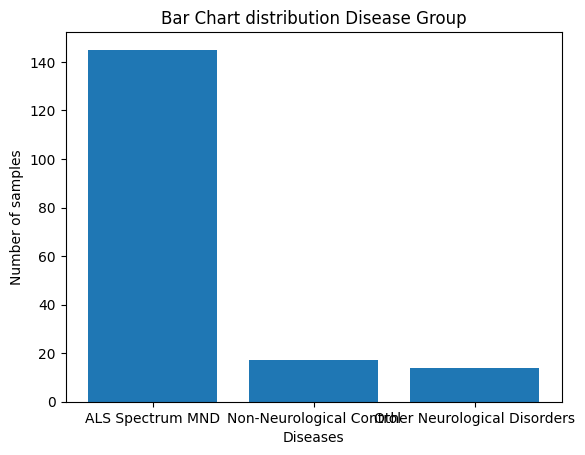

In [171]:
# Bar charts for Disease Group

plt.bar(data_by_diseasegrp.index, data_by_diseasegrp.values)

# Add titles and labels
plt.title('Bar Chart distribution Disease Group')
plt.xlabel('Diseases')
plt.ylabel('Number of samples')

# Show the chart
plt.show()

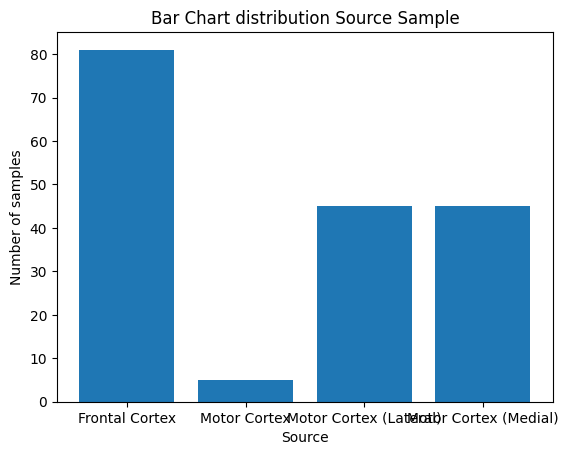

In [172]:
# Bar charts for Sources
plt.bar(data_by_subregion.index, data_by_subregion.values)

# Add titles and labels
plt.title('Bar Chart distribution Source Sample')
plt.xlabel('Source')
plt.ylabel('Number of samples')

# Show the chart
plt.show()

Histogramms for stats on the genes

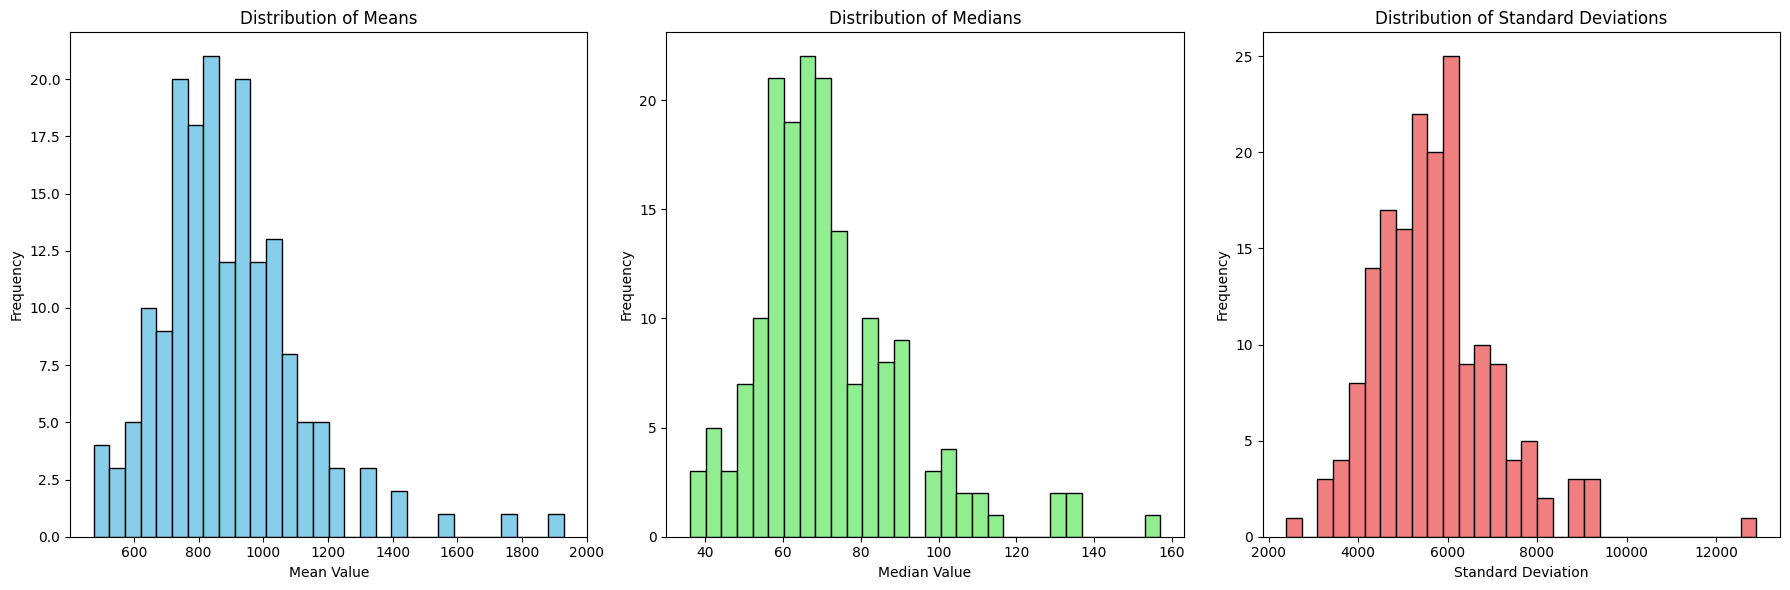

In [173]:
data = c_data.get_data_genes()


means = np.mean(data.values, axis=1)
medians = np.median(data.values, axis=1)
std_devs = np.std(data.values, axis=1)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histo means
axs[0].hist(means, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Means')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Frequency')

# Histo for medians
axs[1].hist(medians, bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Medians')
axs[1].set_xlabel('Median Value')
axs[1].set_ylabel('Frequency')

# Histo for std deviation
axs[2].hist(std_devs, bins=30, color='lightcoral', edgecolor='black')
axs[2].set_title('Distribution of Standard Deviations')
axs[2].set_xlabel('Standard Deviation')
axs[2].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [174]:
c_data.get_data_genes()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,23,113,0,2130,72,71,2,3,21,0,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,134,300,0,6077,171,42,8,5,225,0,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,64,290,0,4752,118,174,8,2,135,0,...,623,1466,1246,726,61,358,107,347,1284,1469


In [175]:
means = c_data.get_data_genes().mean(axis=1)
medians = c_data.get_data_genes().median(axis=1)
std_devs = c_data.get_data_genes().std(axis = 1)

sample_ids = c_data.get_data_genes().index

data = {
    'Mean': means,
    'Median':medians,
    'Std_dev': std_devs,
}

sample_stats = pd.DataFrame(data)
sample_stats


,Mean,Median,Std_dev
Sample_id,,,
GSM3533230,1041.382378,92.0,7144.948717
GSM3533231,881.608503,65.0,6556.784539
GSM3533232,802.592132,58.0,5618.694081
GSM3533233,785.868615,65.0,6617.736421
GSM3533234,906.813525,61.0,6815.130467
...,...,...,...
GSM3533401,621.179187,51.0,3875.932581
GSM3533402,1412.596518,136.0,7679.231478
GSM3533403,1142.241288,101.0,5264.705168


In [176]:
sample_stats[sample_stats['Std_dev']==max(sample_stats['Std_dev'].values)]

,Mean,Median,Std_dev
Sample_id,,,
GSM3533364,1929.230132,157.0,12904.004636


In [177]:
c_data.get_data_matrix().loc['GSM3533364']

Cns_subregion             Motor Cortex (Medial)
Sample_group                   ALS Spectrum MND
Subject_id                               JHU 83
A1BG                                         58
A1BG-AS1                                    228
                                  ...          
X8_LINE:CR1:LINE                           1180
X9_LINE:L1:LINE                             255
Zaphod2:hAT-Tip100:DNA                      954
Zaphod3:hAT-Tip100:DNA                     3946
Zaphod:hAT-Tip100:DNA                      3902
Name: GSM3533364, Length: 28956, dtype: object

In [178]:
c_data.get_data_genes().loc['GSM3533364'].idxmax(), c_data.get_data_genes().loc['GSM3533364'].max()

('MIRb:MIR:SINE', np.int64(884080))

In [179]:
c_data.get_data_genes()['MIRb:MIR:SINE'].std()

np.float64(100627.5532686476)

In [180]:
c_data.get_data_genes()['MIRb:MIR:SINE'].mean()

np.float64(366426.19886363635)

In [181]:
s_id = c_data.get_data_matrix().loc['GSM3533364']['Subject_id']
s_id

'JHU 83'

In [182]:
c_data.get_data_matrix()[c_data.get_data_matrix()['Subject_id']==s_id]

,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533363,Motor Cortex (Lateral),ALS Spectrum MND,JHU 83,19,125,0,2264,85,93,1,...,635,1534,1372,733,98,407,88,396,1369,1486
GSM3533364,Motor Cortex (Medial),ALS Spectrum MND,JHU 83,58,228,0,3953,227,260,4,...,1824,4240,3761,2046,235,1180,255,954,3946,3902
GSM3533365,Motor Cortex (Lateral),ALS Spectrum MND,JHU 83,32,91,0,2537,87,84,2,...,637,1505,1384,724,90,358,65,348,1408,1409


In [183]:
outlier_ids = c_data.get_data_matrix()[c_data.get_data_matrix()['Subject_id']==s_id].index.values.tolist()

In [184]:
for id in outlier_ids:
    print("id sample:",id,"mean:",c_data.get_data_genes().loc[id].mean(), "median:",c_data.get_data_genes().loc[id].median(), "std:",c_data.get_data_genes().loc[id].std())

id sample: GSM3533363 mean: 736.4009601768383 median: 60.0 std: 4855.3268535997095
id sample: GSM3533364 mean: 1929.230131592581 median: 157.0 std: 12904.004635996334
id sample: GSM3533365 mean: 754.6600006907747 median: 65.0 std: 4815.672408576015


Text(0, 0.5, 'Frequency')

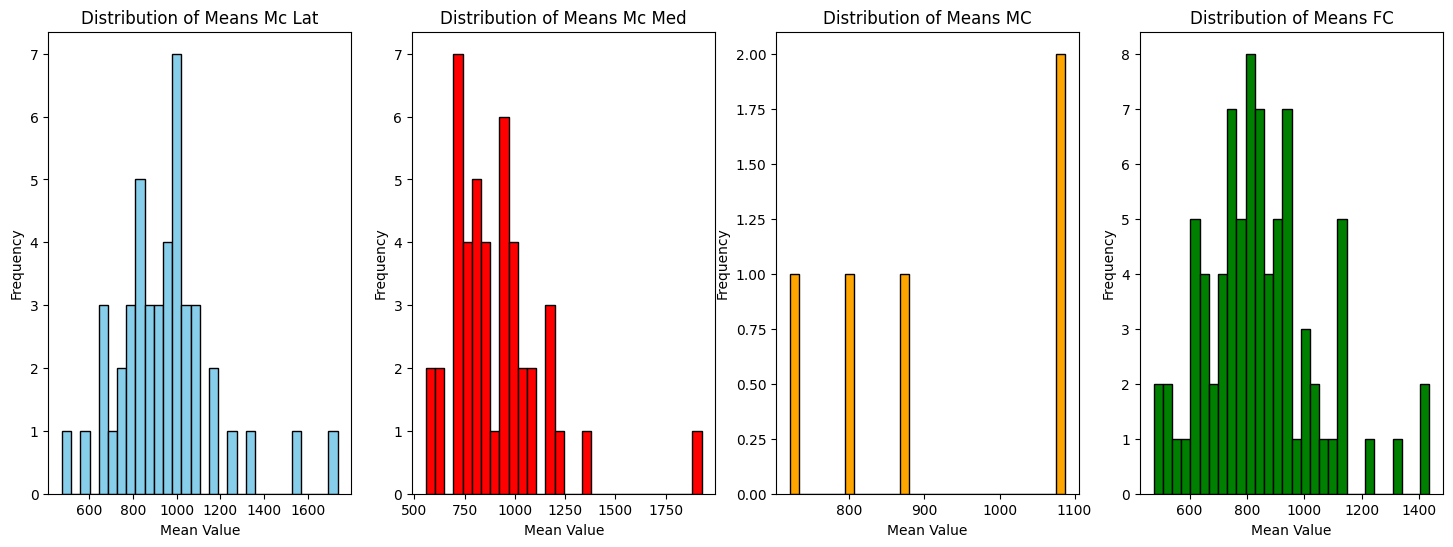

In [185]:
data = c_data.get_data_subregion_genes()
data_mc_lat = data[data['Cns_subregion'] == 'Motor Cortex (Lateral)' ]

means_mc_lat = data_mc_lat.mean(axis=1, numeric_only=True)

# ---
data = c_data.get_data_subregion_genes()
data_mc_med = data[data['Cns_subregion'] == 'Motor Cortex (Medial)' ]

means_mc_med = data_mc_med.mean(axis=1, numeric_only=True)

# ----
data = c_data.get_data_subregion_genes()
data_mc = data[data['Cns_subregion'] == 'Motor Cortex' ]

means_mc = data_mc.mean(axis=1, numeric_only=True)

# ---
data = c_data.get_data_subregion_genes()
data_fc = data[data['Cns_subregion'] == 'Frontal Cortex' ]

means_fc = data_fc.mean(axis=1, numeric_only=True)



fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# Histo means
axs[0].hist(means_mc_lat, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Means Mc Lat')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Frequency')


axs[1].hist(means_mc_med, bins=30, color='red', edgecolor='black')
axs[1].set_title('Distribution of Means Mc Med')
axs[1].set_xlabel('Mean Value')
axs[1].set_ylabel('Frequency')


axs[2].hist(means_mc, bins=30, color='orange', edgecolor='black')
axs[2].set_title('Distribution of Means MC')
axs[2].set_xlabel('Mean Value')
axs[2].set_ylabel('Frequency')

axs[3].hist(means_fc, bins=30, color='green', edgecolor='black')
axs[3].set_title('Distribution of Means FC')
axs[3].set_xlabel('Mean Value')
axs[3].set_ylabel('Frequency')

In [186]:
data = c_data.get_data_subregion_genes()
data
numerical_columns = data.select_dtypes(include=['number'])
data['mean'] = numerical_columns.mean(axis=1)
data

/tmp/ipykernel_20859/3742113958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mean'] = numerical_columns.mean(axis=1)


,Cns_subregion,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,mean
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,42,149,0,3327,101,78,4,0,67,...,2218,2096,1120,84,556,134,570,2045,2446,1041.382378
GSM3533231,Frontal Cortex,25,107,2,1787,153,109,2,1,25,...,2373,2001,1144,118,582,153,552,2057,2279,881.608503
GSM3533232,Frontal Cortex,20,95,0,1830,121,127,1,1,11,...,2018,1815,1011,84,571,126,479,1659,1778,802.592132
GSM3533233,Frontal Cortex,22,101,0,2131,142,143,5,1,36,...,2278,2032,1198,97,562,132,540,2032,2135,785.868615
GSM3533234,Frontal Cortex,22,102,0,1706,83,178,1,3,31,...,2295,1993,1152,96,582,124,539,1742,1939,906.813525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,23,113,0,2130,72,71,2,3,21,...,1243,1089,658,72,320,73,311,1102,1169,621.179187
GSM3533402,Frontal Cortex,134,300,0,6077,171,42,8,5,225,...,1988,1691,966,119,460,109,399,1619,1724,1412.596518
GSM3533403,Frontal Cortex,64,290,0,4752,118,174,8,2,135,...,1466,1246,726,61,358,107,347,1284,1469,1142.241288


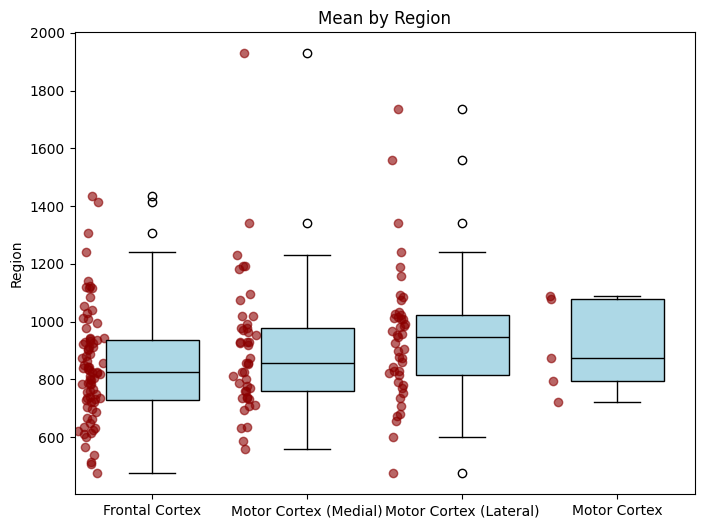

In [187]:
fig, ax = plt.subplots(figsize=(8,6))

# Extraire les données par groupe
groups = [data[data['Cns_subregion'] == region]['mean'] for region in data['Cns_subregion'].unique()]

# Tracer le box plot
box = ax.boxplot(groups, patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

# Ajout des points individuels (jitter)
for i, group in enumerate(groups, 1):
    x = np.random.normal(i - 0.4, 0.03, size=len(group))  # Ajout d'un léger décalage
    ax.scatter(x, group, color='darkred', alpha=0.6)

# Ajout des labels
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(data['Cns_subregion'].unique())
ax.set_ylabel('Region')
ax.set_title('Mean by Region')

# Affichage
plt.show()

In [188]:
def find_outliers(df, column, groupby_col=None):
    if groupby_col!=None:
        outliers = []
        for region, group in df.groupby(groupby_col):
            Q1 = group[column].quantile(0.25)
            Q3 = group[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find outliers
            outlier_values = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
            outliers.append(outlier_values)
        
        return pd.concat(outliers)
    else:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers for the entire dataset
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers

In [189]:
outliers_df = find_outliers(data, 'mean', 'Cns_subregion')
outliers_df

,Cns_subregion,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,mean
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533343,Frontal Cortex,56,219,6,4688,150,129,2,4,40,...,2134,1901,1023,84,533,132,563,1751,2131,1308.257210
GSM3533402,Frontal Cortex,134,300,0,6077,171,42,8,5,225,...,1988,1691,966,119,460,109,399,1619,1724,1412.596518
GSM3533404,Frontal Cortex,124,332,0,3516,141,173,3,2,192,...,1846,1680,936,110,479,120,503,1646,1839,1435.251546
GSM3533276,Motor Cortex (Lateral),78,120,0,6849,158,76,5,1,57,...,2064,1979,948,131,446,100,464,1776,2084,1340.550547
GSM3533302,Motor Cortex (Lateral),63,292,2,4053,207,293,5,4,42,...,2959,2836,1516,152,725,206,754,2652,3049,1736.451145
GSM3533307,Motor Cortex (Lateral),18,69,0,946,55,74,0,4,4,...,1401,1148,703,56,410,81,334,1213,1210,476.158326
GSM3533361,Motor Cortex (Lateral),92,341,0,2660,163,288,0,11,78,...,2785,2520,1308,123,632,163,655,2479,2930,1560.718302
GSM3533293,Motor Cortex (Medial),38,166,0,5970,190,153,0,0,129,...,1951,1968,976,101,466,129,549,1618,2049,1342.107726
GSM3533364,Motor Cortex (Medial),58,228,0,3953,227,260,4,5,83,...,4240,3761,2046,235,1180,255,954,3946,3902,1929.230132


In [190]:
data_norm = (c_data.get_data_genes() - c_data.get_data_genes().mean()) / c_data.get_data_genes().std()
data_norm.drop(outliers_df.index.values.tolist(), inplace=True)

In [191]:
outlier_ids
datas = c_data.get_data_genes()
datas.drop(outliers_df.index.values.tolist(), inplace=True)
datas

/tmp/ipykernel_20859/2398580056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.drop(outliers_df.index.values.tolist(), inplace=True)


,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836
GSM3533400,37,182,0,1509,76,76,4,0,28,2,...,520,1324,1146,676,42,364,67,298,1097,1213
GSM3533401,23,113,0,2130,72,71,2,3,21,0,...,553,1243,1089,658,72,320,73,311,1102,1169


### Genes

In [192]:
'''fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.imshow(data_norm, cmap='viridis', aspect='auto')

# Add color bar
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(list_genes)))
ax.set_yticks(np.arange(len(data_norm.index.values.tolist())))
ax.set_xticklabels(list_genes, rotation=90, fontsize=8)  # Rotate gene labels
ax.set_yticklabels(data_norm.index.values.tolist(), fontsize=8)

# Labels
ax.set_xlabel('Genes')
ax.set_ylabel('Samples')
ax.set_title('Gene Expression Heatmap')

# Show the heatmap
plt.show()'''

"fig, ax = plt.subplots(figsize=(10, 6))\ncax = ax.imshow(data_norm, cmap='viridis', aspect='auto')\n\n# Add color bar\nfig.colorbar(cax)\n\n# Set ticks and labels\nax.set_xticks(np.arange(len(list_genes)))\nax.set_yticks(np.arange(len(data_norm.index.values.tolist())))\nax.set_xticklabels(list_genes, rotation=90, fontsize=8)  # Rotate gene labels\nax.set_yticklabels(data_norm.index.values.tolist(), fontsize=8)\n\n# Labels\nax.set_xlabel('Genes')\nax.set_ylabel('Samples')\nax.set_title('Gene Expression Heatmap')\n\n# Show the heatmap\nplt.show()"

In [193]:
data_by_diseasegrp

Sample_group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [194]:
c_data.get_data_matrix()

,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6,42,149,0,3327,101,78,4,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP,25,107,2,1787,153,109,2,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ,20,95,0,1830,121,127,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2,22,101,0,2131,142,143,5,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND,22,102,0,1706,83,178,1,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4,23,113,0,2130,72,71,2,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL,134,300,0,6077,171,42,8,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW,64,290,0,4752,118,174,8,...,623,1466,1246,726,61,358,107,347,1284,1469


In [195]:
len(list_all_genes)
len(c_data.get_data_matrix().columns)

28956

### Genes statistics

In [196]:
df = c_data.get_mrn_data_genes()
gene_stats = pd.DataFrame({
    'Mean': df.mean(axis=0),
    'Median': df.median(axis=0),
    'Std': df.std(axis=0)
})


In [197]:
gene_stats 

,Mean,Median,Std
A1BG,56.316908,50.306072,30.348211
A1BG-AS1,51.694939,47.305278,20.987782
A1CF,0.000000,0.000000,0.000000
A2M,54.841302,51.068853,28.551922
A2M-AS1,51.962135,47.874708,18.012035
...,...,...,...
X8_LINE:CR1:LINE,49.137072,47.581360,13.716520
X9_LINE:L1:LINE,49.723518,47.990636,15.068840
Zaphod2:hAT-Tip100:DNA,50.867955,50.081351,14.966822
Zaphod3:hAT-Tip100:DNA,47.868213,48.079589,14.231457


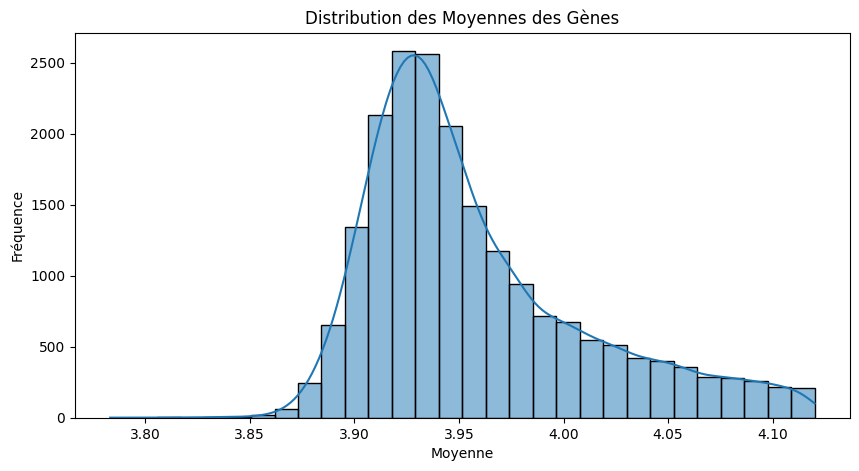

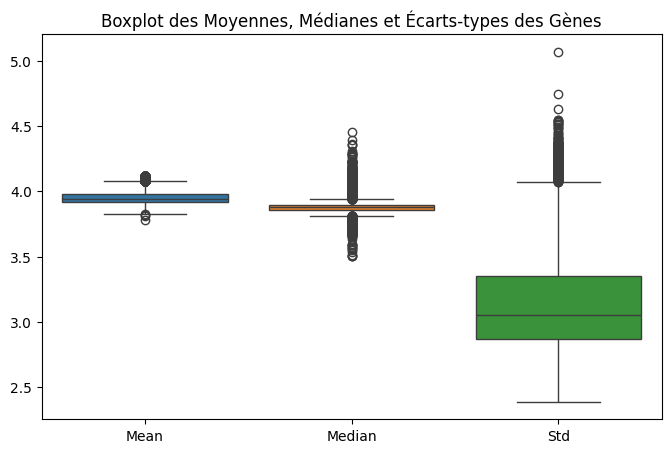

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
o = find_outliers(gene_stats, "Mean")
y = gene_stats
y.drop(o.index.values.tolist(), inplace=True)
y_log = np.log(y)
# Histogramme des moyennes
plt.figure(figsize=(10,5))
sns.histplot(y_log['Mean'], bins=30, kde=True)
plt.title("Distribution des Moyennes des Gènes")
plt.xlabel("Moyenne")
plt.ylabel("Fréquence")
plt.show()

# Boxplot des valeurs
plt.figure(figsize=(8,5))
sns.boxplot(data=y_log)
plt.title("Boxplot des Moyennes, Médianes et Écarts-types des Gènes")
plt.show()


We can see that most of the genes have a mean between 0 and 50000, a few are between 50k and 150k. Some outsiders are also present.

In [199]:
# Display most variable genes
gene_stats_sorted = gene_stats.sort_values(by="Std", ascending=False)
print(gene_stats_sorted.head(10))  # Top 10 most variable genes

                Mean     Median         Std
COL6A5     61.023167  55.361223  159.585202
IRS4       60.715991  49.401916  115.414791
IL13RA2    60.026039  47.875753  102.706547
HTR7       58.270079  48.599191   94.766566
CXCL6      60.438214  52.142773   94.232451
SAA2-SAA4  60.443728  56.286223   93.996286
GOLGA6L1   60.297768  62.060860   93.457963
TRPM8      60.640818  46.336255   92.893188
LINC01258  61.281417  56.174632   92.698643
DOK7       59.583865  48.718979   91.874122


Separation des echantillons entre malades et pas malades

In [200]:
df_als = c_data.get_data_als()
df_control = c_data.get_data_control()

In [201]:
# Compute descriptive statistics for ALS and Control separately
als_stats = df_als.describe().T
control_stats = df_control.describe().T

# Add a column to show difference in mean expression
als_stats["Control_Mean"] = control_stats["mean"]
als_stats["Diff_Mean"] = als_stats["mean"] - als_stats["Control_Mean"]

# Show top differentially expressed genes
als_stats_sorted = als_stats.sort_values(by="Diff_Mean", ascending=False)
print(als_stats_sorted.head(10))  # Genes with largest mean difference

als_stats

              count          mean           std        min        25%  \
NPAS4         145.0    841.691927   4504.150860   0.000000  18.615822   
MMP8          145.0    737.525893   2411.345788   0.000000   0.000000   
MIR6723       145.0    539.090124   1837.775679   0.000000   0.000000   
RNF17         145.0    310.168996    751.834748   0.000000  23.448647   
DSC3          145.0    519.353321   1366.841262   0.000000   0.000000   
TTTY15        145.0  15266.720285  17917.446506   0.000000   0.000000   
HP            145.0    456.847146   1603.705529   0.000000   0.000000   
BRS3          145.0    274.597522   1464.284585   0.000000   0.000000   
C5orf17       145.0    235.793847    828.895499   0.000000  15.583458   
LOC100288637  145.0    220.168255   1040.049143  13.064731  37.742557   

                     50%           75%           max  Control_Mean   Diff_Mean  
NPAS4          55.847466    130.310754  42602.308781    338.387604  503.304323  
MMP8          183.118586    549.35

,count,mean,std,min,25%,50%,75%,max,Control_Mean,Diff_Mean
A1BG,145.0,55.795863,30.054627,14.795904,36.989759,48.826482,63.622385,198.265108,58.754056,-2.958193
A1BG-AS1,145.0,52.048585,22.402985,17.003741,38.803408,47.523275,61.475062,148.673732,50.040785,2.007800
A1CF,145.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,145.0,55.545316,29.886716,9.805041,32.296332,49.628249,73.414967,159.404508,51.548334,3.996981
A2M-AS1,145.0,52.435951,18.143741,17.224763,40.528854,48.128014,61.299891,115.000622,49.745899,2.690052
...,...,...,...,...,...,...,...,...,...,...
X8_LINE:CR1:LINE,145.0,48.954012,13.925107,19.011302,40.359189,47.368943,55.865615,125.325904,49.993318,-1.039306
X9_LINE:L1:LINE,145.0,49.973362,14.880454,20.631488,39.468934,47.990636,58.754891,114.370208,48.554891,1.418471
Zaphod2:hAT-Tip100:DNA,145.0,51.112456,15.594551,16.632634,40.236299,50.753995,59.314909,116.673038,49.724318,1.388139
Zaphod3:hAT-Tip100:DNA,145.0,47.817187,14.665344,18.893355,37.940565,47.387242,54.956893,121.422116,48.106885,-0.289699


/home/lenora/miniconda3/envs/pydeseq2/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/lenora/miniconda3/envs/pydeseq2/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/home/lenora/miniconda3/envs/pydeseq2/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


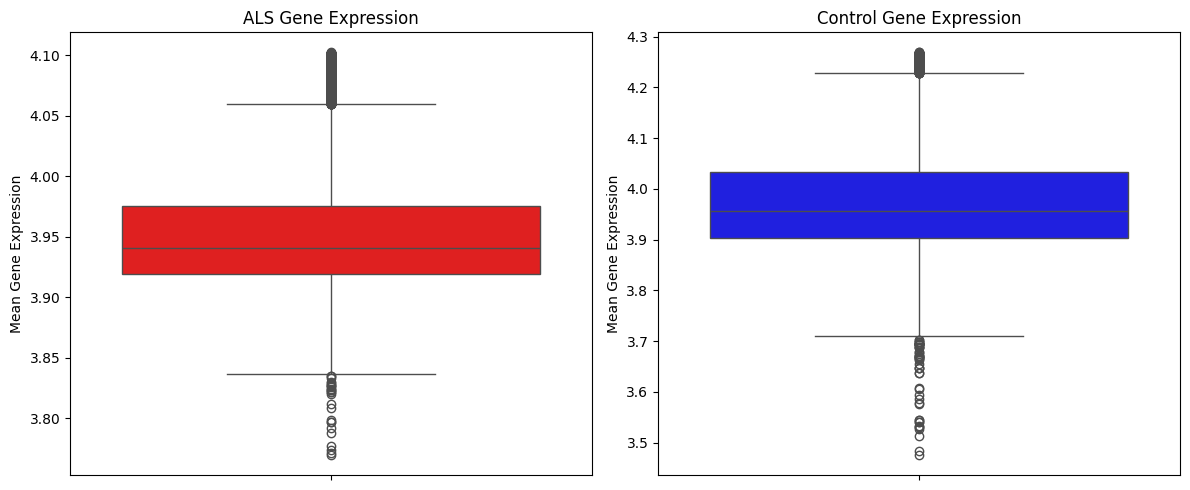

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
o = find_outliers(als_stats, "mean")
y = als_stats
y.drop(o.index.values.tolist(), inplace=True)
y_log = np.log(y)
sns.boxplot(data=y_log["mean"], color="red", ax=axes[0])
axes[0].set_title("ALS Gene Expression")
axes[0].set_ylabel("Mean Gene Expression")

o = find_outliers(control_stats, "mean")
y = control_stats
y.drop(o.index.values.tolist(), inplace=True)
y_log = np.log(y)
sns.boxplot(data=y_log["mean"], color="blue", ax=axes[1])
axes[1].set_title("Control Gene Expression")
axes[1].set_ylabel("Mean Gene Expression")

plt.tight_layout()
plt.show()

        count       mean         std        min        25%        50%  \
AANAT    31.0  70.489557   53.738884   0.000000  39.372546  59.058818   
ABCA1    31.0  69.606434   48.516165  34.217221  44.085108  50.620982   
ABCC13   31.0  68.352444  113.938714   0.000000   0.000000  54.331430   
ABCC2    31.0  68.420849   43.514086  10.967147  43.868590  54.835737   
ABHD1    31.0  70.223863   44.382174  19.264954  38.529907  52.978622   

              75%         max  
AANAT   98.431364  236.235273  
ABCA1   77.949904  278.543554  
ABCC13  54.331430  434.651437  
ABCC2   82.253606  195.215224  
ABHD1   93.916648  192.649535  
--------------
          count       mean        std        min        25%        50%  \
A1BG       31.0  58.754056  32.084019  23.673446  32.550988  54.744843   
A1BG-AS1   31.0  50.040785  12.529385  26.159601  41.419368  46.651288   
A2M        31.0  51.548334  21.315915  15.120758  37.857733  53.469860   
A2M-AS1    31.0  49.745899  17.499430  15.704931  38.50241

/home/lenora/miniconda3/envs/pydeseq2/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


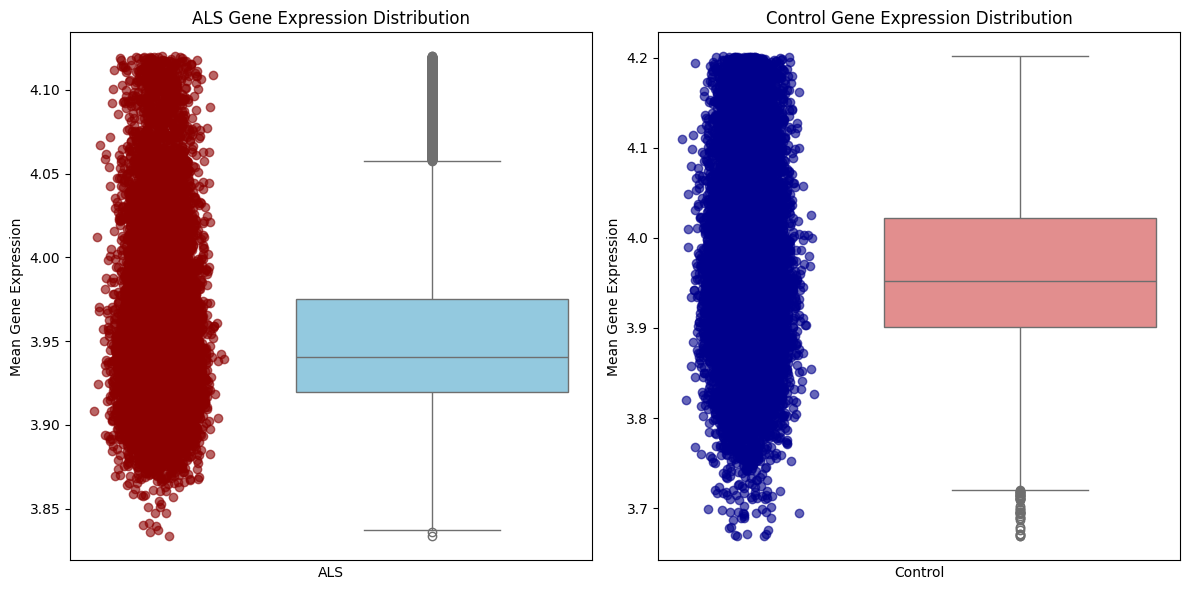

In [203]:
# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

o = find_outliers(als_stats, "mean")
y = gene_stats
y.drop(o.index, inplace=True, errors='ignore')
y_log = np.log(y)
# First Boxplot: ALS
sns.boxplot(data=y_log["Mean"], color="skyblue", ax=axes[0])

# Add jittered points for ALS
x_als = np.random.normal(-0.8, 0.05, size=len(y_log["Mean"]))  
axes[0].scatter(x_als, y_log["Mean"], color="darkred", alpha=0.6)

# Set labels and title for ALS
axes[0].set_xticks([])
axes[0].set_xlabel("ALS")
axes[0].set_ylabel("Mean Gene Expression")
axes[0].set_title("ALS Gene Expression Distribution")

# Second Boxplot: Control
o = find_outliers(control_stats, "mean")
y = control_stats
print(o.head())
print("--------------")
print(y.head())
y.drop(o.index, inplace=True, errors='ignore')
y_log = np.log(y)


sns.boxplot(data=y_log["mean"], color="lightcoral", ax=axes[1])

# Add jittered points for Control
x_control = np.random.normal(-0.8 , 0.05, size=len(y_log["mean"]))  
axes[1].scatter(x_control, y_log["mean"], color="darkblue", alpha=0.6)

# Set labels and title for Control
axes[1].set_xticks([])
axes[1].set_xlabel("Control")
axes[1].set_ylabel("Mean Gene Expression")
axes[1].set_title("Control Gene Expression Distribution")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

In [204]:
mean_als_outliers = find_outliers(als_stats, "mean")
mean_control_outliers = find_outliers(control_stats, "mean")

als_stats_no_outliers = als_stats.drop(mean_als_outliers.index)
control_stats_no_outliers = control_stats.drop(mean_control_outliers.index)


              Mean    Median       Std
A1BG      4.030995  3.918126  3.412738
A1BG-AS1  3.945360  3.856622  3.043940
A2M       4.004444  3.933175  3.351724
A2M-AS1   3.950515  3.868587  2.891040
A2ML1     3.967971  3.894715  3.330601
AA06      3.918968  3.869414  3.260416
AAAS      3.928999  3.880956  2.825695
AACS      3.887610  3.846696  2.913113
AACSP1    3.959744  3.913934  3.234820
AADAT     3.912276  3.887780  2.637692


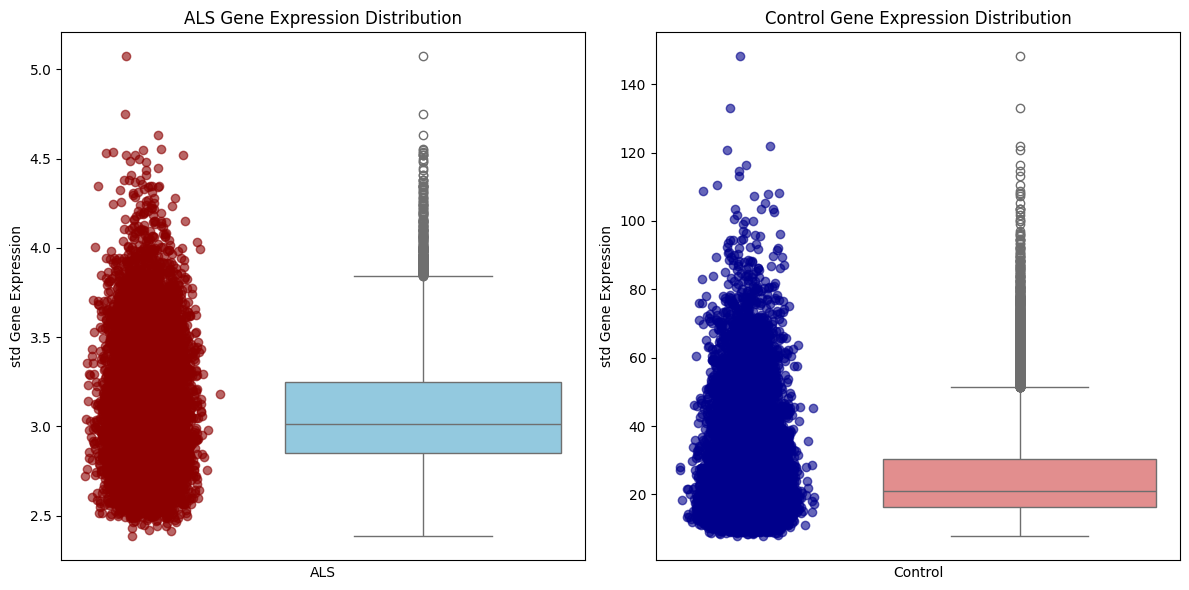

In [205]:
# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First Boxplot: ALS
o = find_outliers(als_stats, "std")
y = gene_stats
y.drop(o.index, inplace=True, errors='ignore')
y_log = np.log(y)
print(y_log.head(10))
sns.boxplot(data=y_log["Std"], color="skyblue", ax=axes[0])

# Add jittered points for ALS
x_als = np.random.normal(-0.8, 0.05, size=len(y_log["Std"]))  
axes[0].scatter(x_als, y_log["Std"], color="darkred", alpha=0.6)

# Set labels and title for ALS
axes[0].set_xticks([])
axes[0].set_xlabel("ALS")
axes[0].set_ylabel("std Gene Expression")
axes[0].set_title("ALS Gene Expression Distribution")

# Second Boxplot: Control
sns.boxplot(data=control_stats["std"], color="lightcoral", ax=axes[1])

# Add jittered points for Control
x_control = np.random.normal(-0.8 , 0.05, size=len(control_stats["std"]))  
axes[1].scatter(x_control, control_stats["std"], color="darkblue", alpha=0.6)

# Set labels and title for Control
axes[1].set_xticks([])
axes[1].set_xlabel("Control")
axes[1].set_ylabel("std Gene Expression")
axes[1].set_title("Control Gene Expression Distribution")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


Clairement y a un problème

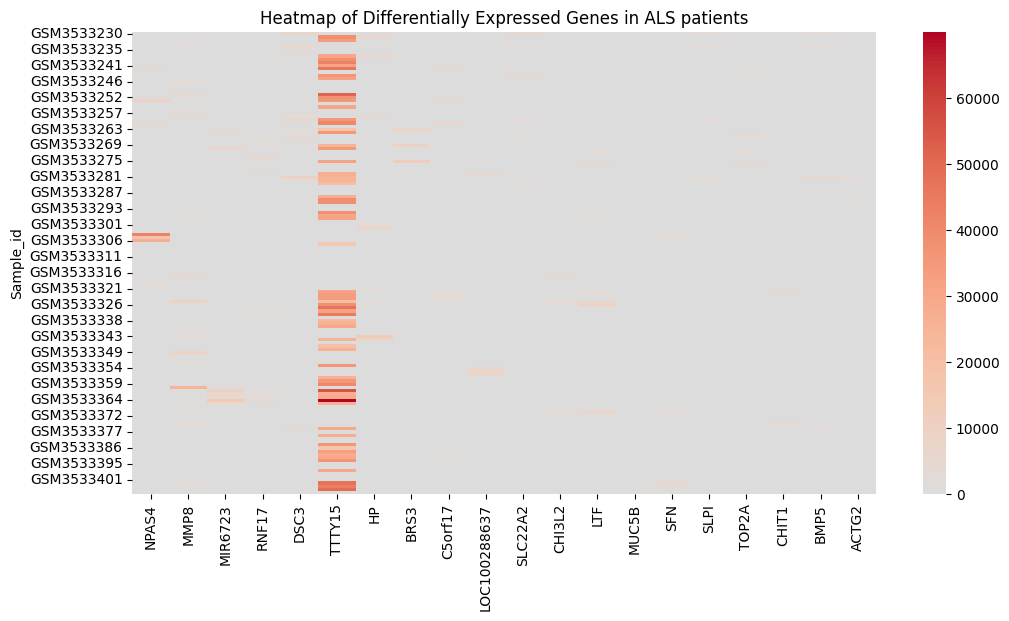

In [206]:
top_genes = als_stats_sorted.head(20).index  # Select top 20 DEGs
df_subset = c_data.get_data_als()[top_genes]  # Extract relevant genes

plt.figure(figsize=(12,6))
sns.heatmap(df_subset, cmap="coolwarm", center=0)
#sns.heatmap(df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Differentially Expressed Genes in ALS patients")
plt.show()


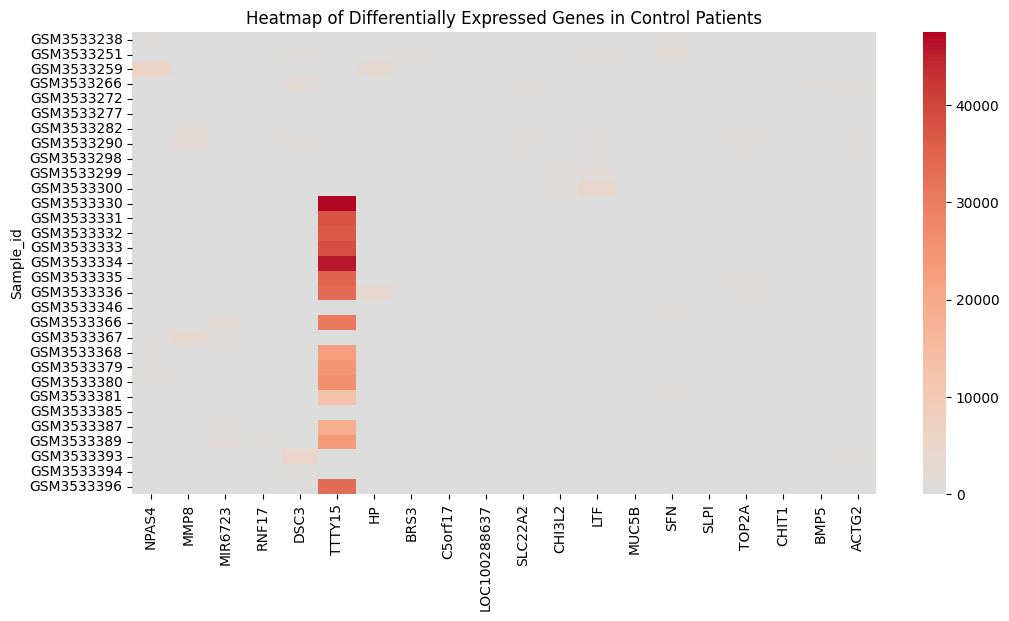

In [207]:
top_genes = als_stats_sorted.head(20).index  # Select top 20 DEGs
df_subset = c_data.get_data_control()[top_genes]  # Extract relevant genes

plt.figure(figsize=(12,6))
sns.heatmap(df_subset, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes in Control Patients")
plt.show()

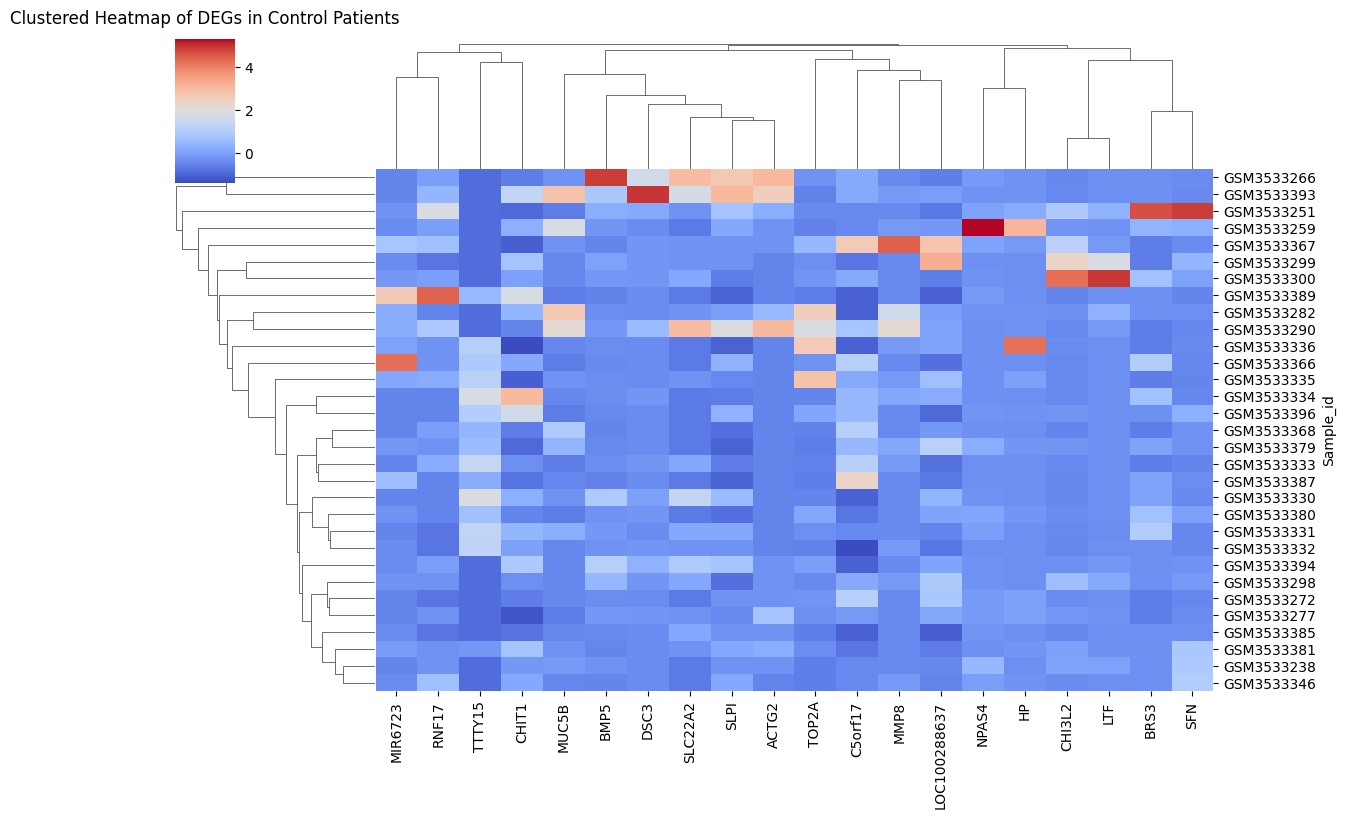

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

top_genes = als_stats_sorted.head(20).index
df_subset = c_data.get_data_control()[top_genes]

# Standardize data (optional but useful for heatmaps)
df_standardized = (df_subset - df_subset.mean()) / df_subset.std()

# Plot with clustermap
sns.clustermap(df_standardized, cmap="coolwarm", figsize=(12, 8), 
               metric='euclidean', method='average', 
               z_score=None, col_cluster=True, row_cluster=True)

plt.title("Clustered Heatmap of DEGs in Control Patients", y=1.05)
plt.show()


### Data transformation

In [210]:
df = c_data.get_mrn_data_genes()
df_log = np.log2(df + 1)

In [211]:
df_als_log = np.log2(df_als + 1)

In [212]:
df_control_log = np.log2(df_control + 1)

Text(0.5, 1.0, 'Log-Transformed Genes Distribution')

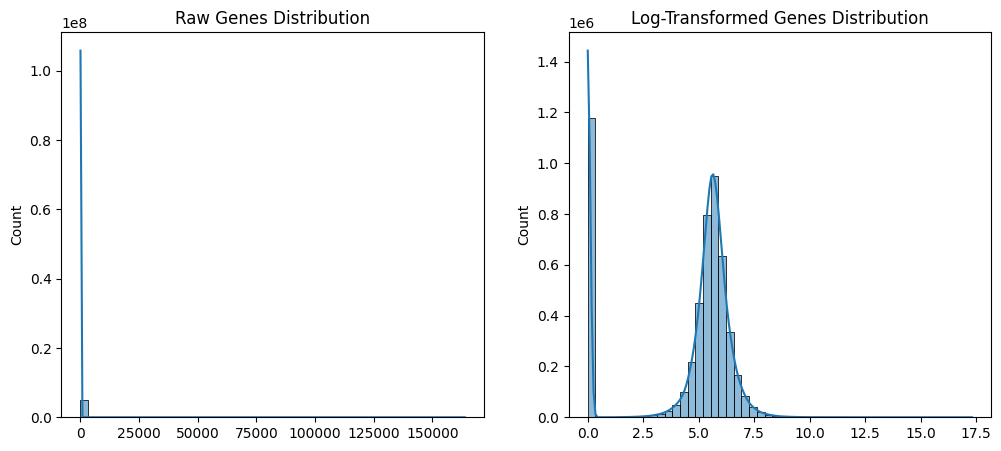

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df.values.flatten(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Raw Genes Distribution")

sns.histplot(df_log.values.flatten(), bins=50, kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed Genes Distribution")

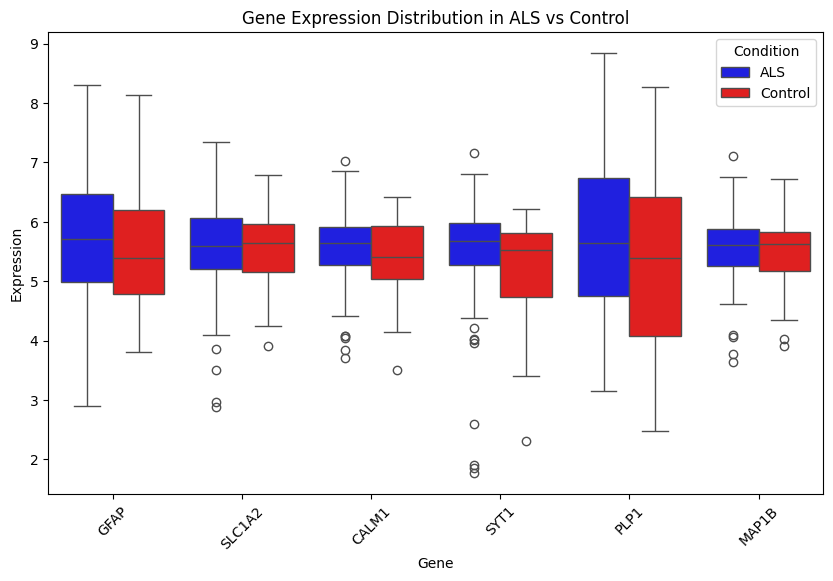

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selection of a few genes for visualization
selected_genes = ["GFAP", "SLC1A2", "CALM1", "SYT1", "PLP1", "MAP1B"]  # Replace with actual gene names

df_als_log["Condition"] = "ALS"
df_control_log["Condition"] = "Control"

df_combined = pd.concat([df_als_log, df_control_log])

# Convert data to long format for seaborn
df_long = df_combined.melt(id_vars=["Condition"], value_vars=selected_genes, var_name="Gene", value_name="Expression")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Gene", y="Expression", hue="Condition", data=df_long, palette=["blue", "red"])
plt.title("Gene Expression Distribution in ALS vs Control")
plt.xticks(rotation=45)
plt.show()


On peut pas vraiment voir de grosse differences entre control et als là ?

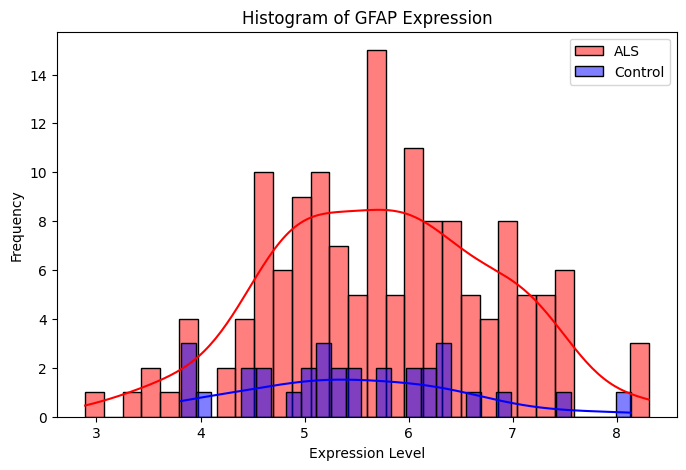

In [215]:
gene_of_interest = "GFAP"  # Replace with actual gene name

plt.figure(figsize=(8, 5))
sns.histplot(df_als_log[gene_of_interest], color="red", label="ALS", kde=True, bins=30)
sns.histplot(df_control_log[gene_of_interest], color="blue", label="Control", kde=True, bins=30)
plt.title(f"Histogram of {gene_of_interest} Expression")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.legend()
plt.show()

On voit une vraie diff entre control et als là pour le coup

/tmp/ipykernel_20859/3117973073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap_als["Condition"] = ["ALS"] * len(df_als_log)
/tmp/ipykernel_20859/3117973073.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap_control["Condition"] =  ["Control"] * len(df_control_log)


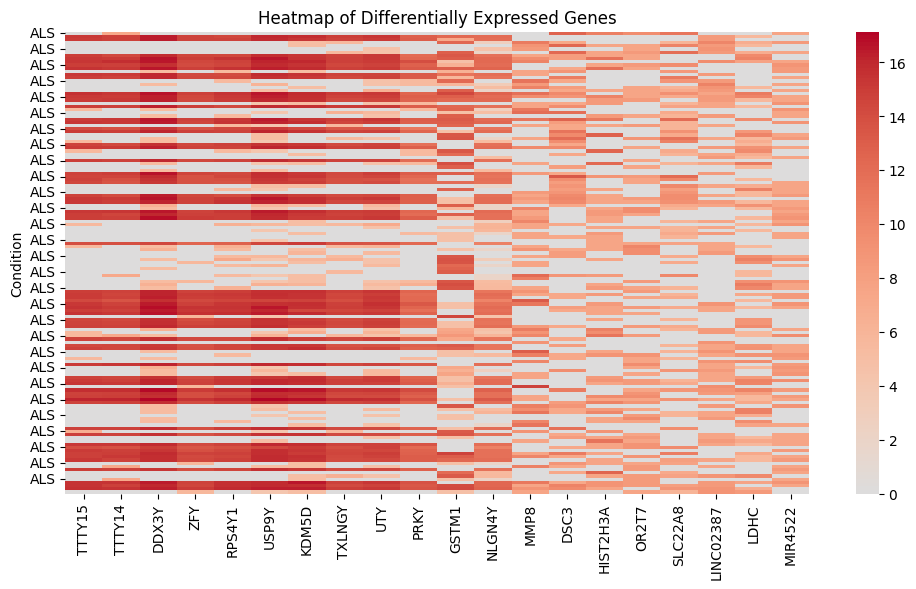

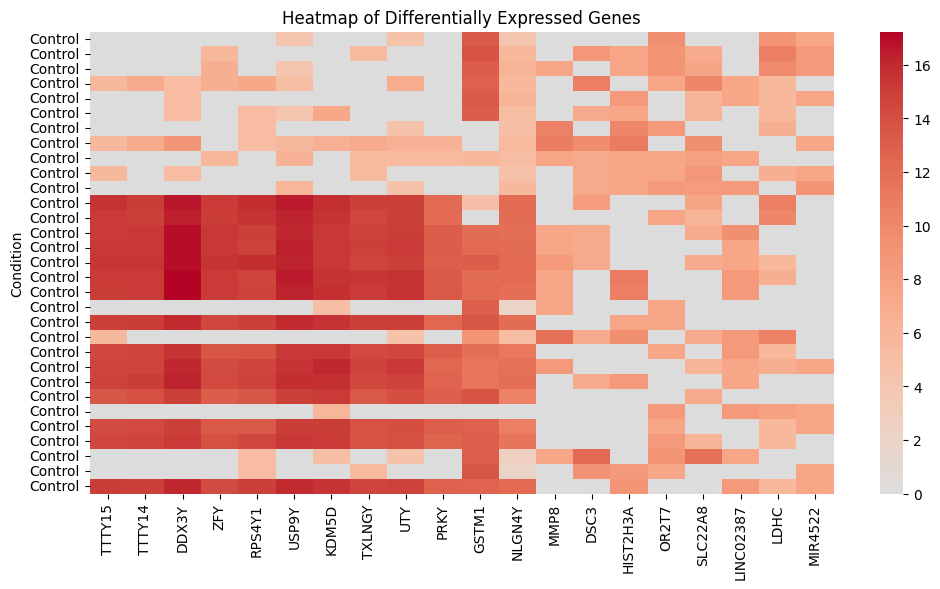

In [216]:
df_als_log = np.log2(df_als + 1)
df_control_log = np.log2(df_control + 1)
# Compute the standard deviation for each gene
std_als = df_als_log.std()
std_control = df_control_log.std()

# Select the top 20 most variable genes
top_variable_genes = std_als.nlargest(20).index  # Get top 20 variable genes in ALS

# Combine ALS and Control data for selected genes
df_heatmap_als = df_als_log[top_variable_genes]
df_heatmap_control = df_control_log[top_variable_genes]

# Add condition labels
df_heatmap_als["Condition"] = ["ALS"] * len(df_als_log) 
df_heatmap_als = df_heatmap_als.set_index("Condition")

df_heatmap_control["Condition"] =  ["Control"] * len(df_control_log)
df_heatmap_control = df_heatmap_control.set_index("Condition")

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap_als, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes")
plt.show()


plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap_control, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes")
plt.show()

Truc chelou avec XIST, à regarder plus precisement

In [223]:
def heatmap_comparison(set_of_genes, df1, df2):
    # Extract relevant genes
    df1_subset = df1[set_of_genes]  
    df2_subset = df2[set_of_genes]

    # Create a figure with 2 subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot ALS heatmap
    sns.heatmap(df1_subset, cmap="coolwarm", center=0, ax=axes[0])
    axes[0].set_title("ALS Patients")

    # Plot Control heatmap
    sns.heatmap(df2_subset, cmap="coolwarm", center=0, ax=axes[1])
    axes[1].set_title("Control Patients")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

In [224]:
for i in tqdm(range(0, len(als_stats), 20)) :
    subset_genes = als_stats.iloc[i:i+20].index
    #heatmap_comparison(subset_genes, c_data.get_data_als(), c_data.get_data_control())

100%|██████████| 1005/1005 [00:00<00:00, 26211.95it/s]


## Step 3

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
my_data = c_data.get_data_genes()
my_data = my_data.loc[:, my_data.var() > 0]
X = scaler.fit_transform(my_data) # my_data being your dataframe containing your genes in column and samples in row

In [ ]:
X

array([[ 0.19251575,  0.63398434,  0.68375795, ...,  1.2625332 ,
         1.06112223,  1.45131029],
       [-0.63866337, -0.24099928, -0.52435513, ...,  1.11502969,
         1.08714238,  1.1101587 ],
       [-0.88312782, -0.4909946 , -0.4906221 , ...,  0.51682101,
         0.22414049,  0.08670394],
       ...,
       [ 1.26815933,  3.57142936,  1.80165479, ..., -0.5648714 ,
        -0.58898943, -0.54452863],
       [ 4.20173273,  4.44641298,  0.83202637, ...,  0.71349236,
         0.19595199,  0.2113162 ],
       [ 1.85487401,  1.55063385,  1.429807  , ...,  0.09069976,
         0.13740664,  0.0315477 ]])

In [ ]:
components = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]

In [ ]:
pca = PCA(n_components=10)  # Reduce to 10 principal components
principal_components = pca.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components, columns=components, index=my_data.index)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.30097067 0.08687648 0.07840726 0.04863404 0.02981296 0.02514091
 0.0195235  0.01727648 0.01235369 0.00986599]


In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Sample_id,,,,,,,,,,
GSM3533230,62.189174,-12.897833,11.867563,-56.248413,73.216334,18.947106,-45.707973,-36.097319,0.939422,-1.159303
GSM3533231,-27.252140,1.192609,-13.358047,-42.324446,-16.980912,-9.046456,-12.474458,10.448253,19.290385,-1.704072
GSM3533232,-54.085294,15.836061,-33.928655,-30.355929,-12.881988,-1.170888,-4.387975,7.034653,22.413983,-2.079066
GSM3533233,-60.384630,-14.240843,30.185720,-52.233838,-18.956427,24.258745,2.427209,6.973536,15.901631,-5.043732
GSM3533234,-19.105174,-20.943224,-44.124193,-61.532352,-11.558459,51.674301,-10.110650,3.750161,26.351499,-13.946001
...,...,...,...,...,...,...,...,...,...,...
GSM3533401,-101.016499,-28.157803,7.609165,39.095587,-10.347585,-10.028551,-8.305091,2.585212,13.534923,1.980595
GSM3533402,248.515883,31.151562,164.502248,87.354966,-25.124261,55.818335,-54.870458,-22.942889,19.252973,-8.479375
GSM3533403,147.197780,-69.459740,45.074689,93.555580,-30.418801,14.538922,17.915815,-45.237689,21.397997,-2.276655


In [ ]:
df_labels = c_data.get_data_matrix()['Sample_group']
df_labels.unique()

array(['ALS Spectrum MND', 'Non-Neurological Control',
       'Other Neurological Disorders'], dtype=object)

In [ ]:
df_labels = c_data.get_data_matrix()['Sample_group']
df_pca = df_pca.merge(df_labels, left_index=True, right_index=True)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sample_group
Sample_id,,,,,,,,,,,
GSM3533230,63.338217,-13.651998,13.371173,57.694200,70.495546,-2.019718,-77.296895,9.495799,-7.206698,-2.215056,ALS Spectrum MND
GSM3533231,-27.705410,1.065093,-14.548488,42.500498,-15.111804,-4.363106,3.992176,-18.078370,-22.126732,-1.671623,ALS Spectrum MND
GSM3533232,-54.598212,15.515728,-34.567249,30.406931,-8.968638,2.947974,6.632049,-9.827838,-23.343734,-2.885412,ALS Spectrum MND
GSM3533233,-60.568733,-14.416886,30.345590,53.151665,-10.737422,30.036447,8.739638,-5.052884,-16.183377,-5.292727,ALS Spectrum MND
GSM3533234,-19.600163,-21.833298,-44.672109,62.305530,2.121305,55.041853,-6.457131,-7.344895,-25.426486,-14.936677,ALS Spectrum MND
...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,-101.283312,-28.015676,7.741880,-39.156878,-13.153554,-7.630520,-1.315747,-6.940709,-15.061495,2.489382,ALS Spectrum MND
GSM3533402,250.168987,33.405625,166.157513,-85.932252,-32.708487,58.361243,-65.364840,-9.012032,-26.928366,-5.001486,ALS Spectrum MND
GSM3533403,147.743104,-69.120344,44.748210,-93.538686,-35.579858,18.861491,-6.676716,49.736723,-24.148809,-2.984673,ALS Spectrum MND


In [ ]:


# Define color mapping for categories
color_map = {"ALS Spectrum MND": "red", "Non-Neurological Control": "blue", 'Other Neurological Disorders' : 'yellow'}
df_pca["Color"] = df_pca["Sample_group"].map(color_map)


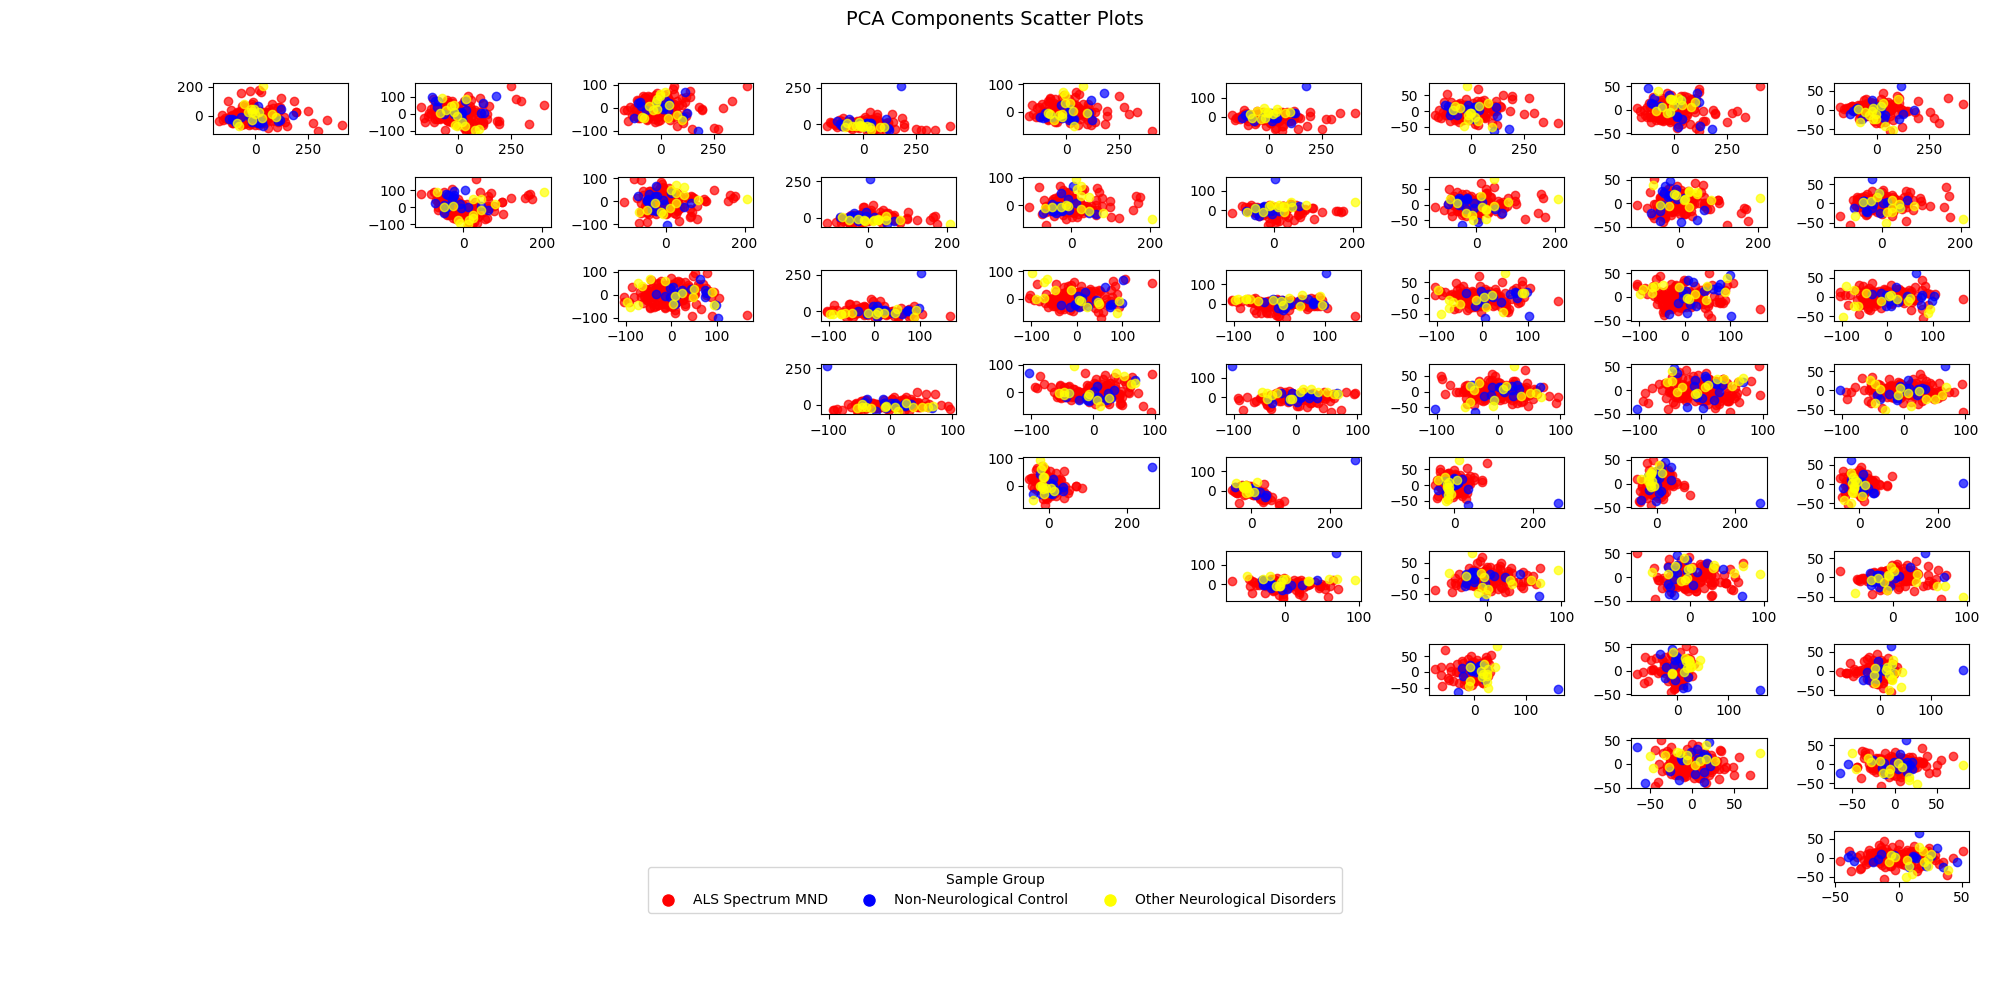

In [ ]:
# Scatter plot of PCA results
fig, axs = plt.subplots(10, 10, figsize=(20, 10))
fig.suptitle('PCA Components Scatter Plots', fontsize=14)
for i in range(10):
    for j in range(10) :
        if j <= i :
            axs[i,j].axis("off")
        else :
            for label in df_pca["Sample_group"].unique():
                subset = df_pca[df_pca["Sample_group"] == label]
                axs[i, j].scatter(subset[components[i]], subset[components[j]], label=label, color=color_map[label], alpha=0.7)
        
# Dummy plot just for the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                      markersize=10, markerfacecolor=color_map[label]) 
           for label in color_map]

# Global legend 
fig.legend(handles=handles, title='Sample Group', loc='center', fontsize=10, bbox_to_anchor=(0.5, 0.1), ncol=3)

# Adjust layout to prevent overlap and allow space for the legend
plt.tight_layout(rect=[0, 0, 1, 0.96])  


## Step 5

In [ ]:
import os
import pickle as pkl

import numpy as np

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [ ]:
counts_df = c_data.get_data_genes()
metadata = c_data.get_data_matrix()[['Sample_group']]

In [ ]:
samples_to_keep = ~metadata.Sample_group.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [ ]:
counts_df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,23,113,0,2130,72,71,2,3,21,0,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,134,300,0,6077,171,42,8,5,225,0,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,64,290,0,4752,118,174,8,2,135,0,...,623,1466,1246,726,61,358,107,347,1284,1469


In [ ]:
metadata

,Sample_group
Sample_id,
GSM3533230,ALS Spectrum MND
GSM3533231,ALS Spectrum MND
GSM3533232,ALS Spectrum MND
GSM3533233,ALS Spectrum MND
GSM3533234,ALS Spectrum MND
...,...
GSM3533401,ALS Spectrum MND
GSM3533402,ALS Spectrum MND
GSM3533403,ALS Spectrum MND


In [ ]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

In [ ]:


# Set the number of CPUs to use (adjust as per your machine)
inference = DefaultInference(n_cpus=8)

# Create the DESeqDataSet object
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design="~Sample_group",  # 'Sample_group' will be used to compare the conditions
    refit_cooks=True,
    inference=inference,
)


NameError: name 'DefaultInference' is not defined

In [ ]:
dds.deseq2()

Fitting size factors...
... done in 0.11 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 46.92 seconds.

Fitting dispersion trend curve...
... done in 0.57 seconds.

Fitting MAP dispersions...
... done in 48.74 seconds.

Fitting LFCs...
... done in 4.39 seconds.

Calculating cook's distance...
... done in 0.24 seconds.

Replacing 221 outlier genes.

Fitting dispersions...
... done in 0.34 seconds.

Fitting MAP dispersions...
... done in 0.33 seconds.

Fitting LFCs...
... done in 0.08 seconds.



In [ ]:
# Contrast: specify which groups you want to compare. Adjust based on your design.
contrast_cnm = ["Sample_group", "ALS Spectrum MND", "Non-Neurological Control"]  # Compare two conditions (e.g., 'Group A' vs. 'Group B')

# Perform the differential expression analysis
ds_cnm = DeseqStats(
    dds,
    contrast=contrast_cnm,
    alpha=0.05,  # Set significance threshold for p-value
    cooks_filter=True,  # Remove outliers based on Cook's distance
    independent_filter=True,  # Independent filtering for lowly expressed genes
)

ds_cnm.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Sample_group ALS Spectrum MND vs Non-Neurological Control
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993900       -0.018093  0.142810 -0.126694   
A1BG-AS1                 113.742744       -0.052955  0.099424 -0.532623   
A1CF                       0.155759        0.590127  1.757745  0.335729   
A2M                     2345.384521       -0.119105  0.160232 -0.743329   
A2M-AS1                   99.268402        0.186468  0.097540  1.911716   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.854980       -0.058600  0.103594 -0.565669   
X9_LINE:L1:LINE          109.576019        0.073868  0.110992  0.665525   
Zaphod2:hAT-Tip100:DNA   411.010284       -0.065305  0.105699 -0.617834   
Zaphod3:hAT-Tip100:DNA  1539.491089       -0.107348  0.107347 -1.000003   
Zaphod:hAT-Tip100:DNA   1710.104370       -0.084252  0.096951 -0.869016   

   

... done in 1.84 seconds.



In [ ]:
res_df_cnm = ds_cnm.results_df
res_df_cnm

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1BG,35.993900,-0.018093,0.142810,-0.126694,0.899182,0.956135
A1BG-AS1,113.742744,-0.052955,0.099424,-0.532623,0.594294,0.780092
A1CF,0.155759,0.590127,1.757745,0.335729,0.737075,NaN
A2M,2345.384521,-0.119105,0.160232,-0.743329,0.457283,0.680841
A2M-AS1,99.268402,0.186468,0.097540,1.911716,0.055913,0.205327
...,...,...,...,...,...,...
X8_LINE:CR1:LINE,458.854980,-0.058600,0.103594,-0.565669,0.571619,0.765036
X9_LINE:L1:LINE,109.576019,0.073868,0.110992,0.665525,0.505715,0.717554
Zaphod2:hAT-Tip100:DNA,411.010284,-0.065305,0.105699,-0.617834,0.536685,0.741030
Zaphod3:hAT-Tip100:DNA,1539.491089,-0.107348,0.107347,-1.000003,0.317309,0.560354


In [ ]:
# Contrast: specify which groups you want to compare. Adjust based on your design.
contrast_als_cm = ["Sample_group", "ALS Spectrum MND", "Other Neurological Disorders"]  # Compare two conditions (e.g., 'Group A' vs. 'Group B')

# Perform the differential expression analysis
ds_cm = DeseqStats(
    dds,
    contrast=contrast_als_cm,
    alpha=0.05,  # Set significance threshold for p-value
    cooks_filter=True,  # Remove outliers based on Cook's distance
    independent_filter=True,  # Independent filtering for lowly expressed genes
)
ds_cm.summary()


Running Wald tests...


Log2 fold change & Wald test p-value: Sample_group ALS Spectrum MND vs Other Neurological Disorders
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993900       -0.133736  0.154884 -0.863463   
A1BG-AS1                 113.742744        0.106113  0.109191  0.971812   
A1CF                       0.155759        0.364436  1.889572  0.192867   
A2M                     2345.384521        0.306505  0.174980  1.751656   
A2M-AS1                   99.268402       -0.045173  0.105309 -0.428955   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.854980        0.003441  0.113142  0.030411   
X9_LINE:L1:LINE          109.576019        0.028600  0.120971  0.236419   
Zaphod2:hAT-Tip100:DNA   411.010284        0.124907  0.115590  1.080603   
Zaphod3:hAT-Tip100:DNA  1539.491089        0.081647  0.117241  0.696400   
Zaphod:hAT-Tip100:DNA   1710.104370        0.089159  0.105887  0.842018   


... done in 0.31 seconds.



In [ ]:
res_df_cm = ds_cm.results_df

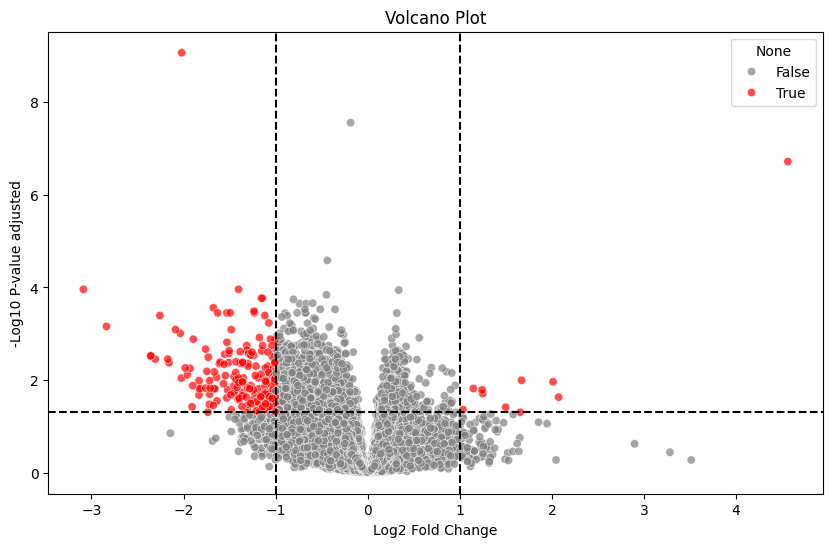

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column for -log10(p-value)
res_df_cnm['-log10p'] = -np.log10(res_df_cnm['padj'])

# Set thresholds for significance
significance_threshold = 0.05
log2_fc_threshold = 1  # Adjust based on your data

# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=res_df_cnm,
    x='log2FoldChange',
    y='-log10p',
    hue=(res_df_cnm['padj'] < significance_threshold) & (abs(res_df_cnm['log2FoldChange']) > log2_fc_threshold),
    palette={True: 'red', False: 'grey'},
    alpha=0.7
)

# Add threshold lines for significance
plt.axhline(y=-np.log10(significance_threshold), color='black', linestyle='--')  # p-value threshold
plt.axvline(x=-log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold
plt.axvline(x=log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold

# Customize the plot
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value adjusted')
plt.show()


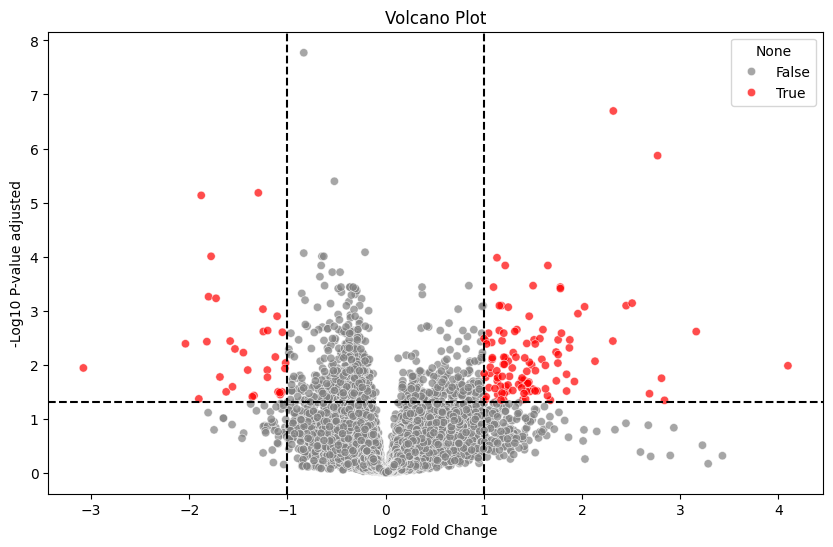

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column for -log10(p-value)
res_df_cm['-log10p'] = -np.log10(res_df_cm['padj'])

# Set thresholds for significance
significance_threshold = 0.05
log2_fc_threshold = 1  # Adjust based on your data

# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=res_df_cm,
    x='log2FoldChange',
    y='-log10p',
    hue=(res_df_cm['padj'] < significance_threshold) & (abs(res_df_cm['log2FoldChange']) > log2_fc_threshold),
    palette={True: 'red', False: 'grey'},
    alpha=0.7
)

# Add threshold lines for significance
plt.axhline(y=-np.log10(significance_threshold), color='black', linestyle='--')  # p-value threshold
plt.axvline(x=-log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold
plt.axvline(x=log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold

# Customize the plot
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value adjusted')
plt.show()

In [ ]:
res_cm = res_df_cm[(res_df_cm['padj'] < significance_threshold) & (abs(res_df_cm['log2FoldChange']) > log2_fc_threshold)]
res_cnm = res_df_cnm[(res_df_cnm['padj'] < significance_threshold) & (abs(res_df_cnm['log2FoldChange']) > log2_fc_threshold)]

In [ ]:
res_cm['Ordre'] = abs(res_cm['log2FoldChange']) * 0.5 + abs(res_cm['padj'])*0.5
res_cnm['Ordre'] = abs(res_cnm['log2FoldChange']) * 0.5 + abs(res_cnm['padj'])*0.5

/tmp/ipykernel_14283/1943356044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_cm['Ordre'] = abs(res_cm['log2FoldChange']) * 0.5 + abs(res_cm['padj'])*0.5
/tmp/ipykernel_14283/1943356044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_cnm['Ordre'] = abs(res_cnm['log2FoldChange']) * 0.5 + abs(res_cnm['padj'])*0.5


In [ ]:
sorted_res_cm = res_cm.sort_values(by='Ordre', ascending=False)
sorted_res_cnm = res_cnm.sort_values(by='Ordre', ascending=False)

In [ ]:
sorted_res_cm

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10p,Ordre
ACTG2,3.307989,4.099158,1.068170,3.837551,0.000124,0.010474,1.979900,2.054816
MUC5B,11.974482,3.164826,0.719948,4.395909,0.000011,0.002443,2.612108,1.583635
LINC01108,2.198125,-3.079378,0.809538,-3.803871,0.000142,0.011508,1.938999,1.545443
HP,4.807042,2.841779,0.906615,3.134494,0.001722,0.045738,1.339723,1.443758
LINC00841,2.094459,2.811259,0.780775,3.600600,0.000317,0.017839,1.748627,1.414549
...,...,...,...,...,...,...,...,...
VWF,1196.677002,1.029745,0.245696,4.191131,0.000028,0.004134,2.383680,0.516939
CCDC168,25.689898,-1.018561,0.262271,-3.883614,0.000103,0.009299,2.031583,0.513930
MYL9,55.161808,1.017647,0.239417,4.250529,0.000021,0.003568,2.447534,0.510608
TNFRSF1B,182.950546,1.003768,0.271993,3.690419,0.000224,0.014606,1.835481,0.509187


In [ ]:
common_genes = sorted_res_cm.index.intersection(sorted_res_cnm.index)

# Afficher les résultats
print(common_genes)

Index(['ADGRE1', 'STC1', 'IL1B', 'CXCL1', 'SECTM1', 'AMN', 'PIK3CD-AS2'], dtype='object')


In [ ]:
cm_common = sorted_res_cm.loc[common_genes]
cnm_common = sorted_res_cnm.loc[common_genes]

# Display the rows for the common genes
print("Rows from cm:")
print(cm_common['Ordre'])

print("\nRows from cnm:")
print(cnm_common['Ordre'])

Rows from cm:
ADGRE1        0.972221
STC1          0.777116
IL1B          0.750804
CXCL1         0.721067
SECTM1        0.624705
AMN           0.608997
PIK3CD-AS2    0.563704
Name: Ordre, dtype: float64

Rows from cnm:
ADGRE1        0.676473
STC1          0.672160
IL1B          0.881331
CXCL1         0.778033
SECTM1        0.544720
AMN           0.510924
PIK3CD-AS2    0.562183
Name: Ordre, dtype: float64


attention regarder comment mieux classer en prenant en compte leur ordre avant

In [ ]:
sorted_res_cm.loc[sorted_res_cm.index.isin(common_genes), 'Ordre'] = 10
sorted_res_cnm.loc[sorted_res_cnm.index.isin(common_genes), 'Ordre'] = 10

In [ ]:
sorted_res_cm = sorted_res_cm.sort_values(by='Ordre', ascending=False)
sorted_res_cm

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10p,Ordre
PIK3CD-AS2,1.248269,-1.095556,0.330471,-3.315131,0.000916,0.031853,1.496848,10.000000
ADGRE1,10.500095,1.923936,0.542676,3.545277,0.000392,0.020507,1.688097,10.000000
AMN,2.979769,-1.205408,0.319739,-3.769969,0.000163,0.012587,1.900090,10.000000
IL1B,55.779003,1.470401,0.442342,3.324126,0.000887,0.031207,1.505753,10.000000
CXCL1,9.356680,1.397377,0.443960,3.147532,0.001647,0.044756,1.349148,10.000000
...,...,...,...,...,...,...,...,...
VWF,1196.677002,1.029745,0.245696,4.191131,0.000028,0.004134,2.383680,0.516939
CCDC168,25.689898,-1.018561,0.262271,-3.883614,0.000103,0.009299,2.031583,0.513930
MYL9,55.161808,1.017647,0.239417,4.250529,0.000021,0.003568,2.447534,0.510608
TNFRSF1B,182.950546,1.003768,0.271993,3.690419,0.000224,0.014606,1.835481,0.509187


In [ ]:
sorted_res_cnm = sorted_res_cnm.sort_values(by='Ordre', ascending=False)
sorted_res_cnm

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10p,Ordre
AMN,2.979769,-1.002482,0.298984,-3.352962,0.000800,0.019366,1.712958,10.000000
IL1B,55.779003,-1.760517,0.397066,-4.433819,0.000009,0.002146,2.668362,10.000000
CXCL1,9.356680,-1.553304,0.361742,-4.293952,0.000018,0.002761,2.558921,10.000000
STC1,36.684105,-1.321106,0.406791,-3.247630,0.001164,0.023213,1.634260,10.000000
ADGRE1,10.500095,-1.310027,0.451334,-2.902568,0.003701,0.042919,1.367355,10.000000
...,...,...,...,...,...,...,...,...
CDC42BPG,2.725452,-1.002056,0.275667,-3.635025,0.000278,0.011327,1.945886,0.506692
CYP21A1P,5.708154,-1.003906,0.268832,-3.734319,0.000188,0.009356,2.028906,0.506631
ZDHHC19,5.376015,-1.008266,0.245512,-4.106786,0.000040,0.004130,2.384081,0.506198
LY6G5B,31.311668,-1.006916,0.219052,-4.596694,0.000004,0.001362,2.865944,0.504139


# Step 7

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
sorted_res_cnm

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10p,Ordre
AMN,2.979769,-1.002482,0.298984,-3.352962,0.000800,0.019366,1.712958,10.000000
IL1B,55.779003,-1.760517,0.397066,-4.433819,0.000009,0.002146,2.668362,10.000000
CXCL1,9.356680,-1.553304,0.361742,-4.293952,0.000018,0.002761,2.558921,10.000000
STC1,36.684105,-1.321106,0.406791,-3.247630,0.001164,0.023213,1.634260,10.000000
ADGRE1,10.500095,-1.310027,0.451334,-2.902568,0.003701,0.042919,1.367355,10.000000
...,...,...,...,...,...,...,...,...
CDC42BPG,2.725452,-1.002056,0.275667,-3.635025,0.000278,0.011327,1.945886,0.506692
CYP21A1P,5.708154,-1.003906,0.268832,-3.734319,0.000188,0.009356,2.028906,0.506631
ZDHHC19,5.376015,-1.008266,0.245512,-4.106786,0.000040,0.004130,2.384081,0.506198
LY6G5B,31.311668,-1.006916,0.219052,-4.596694,0.000004,0.001362,2.865944,0.504139


In [ ]:
X = c_data.get_data_genes_normalized()[sorted_res_cnm.index]
y = c_data.get_data_matrix()['Sample_group']
y = y == 'ALS Spectrum MND'

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train) # xtrain is your data matrix, and y is your group labels (ctrl or ALS)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print(model.feature_importances_)

[0.00125994 0.01920902 0.06253966 0.01982237 0.         0.01740145
 0.01256274 0.00138873 0.         0.01583195 0.         0.
 0.         0.02158656 0.         0.         0.         0.
 0.         0.         0.02616328 0.01936828 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01768926
 0.         0.         0.         0.         0.         0.00778214
 0.03836638 0.         0.         0.         0.         0.01393064
 0.         0.         0.         0.00332408 0.         0.01304352
 0.         0.         0.         0.         0.045316   0.00781815
 0.         0.         0.00464593 0.         0.         0.01453757
 0.         0.         0.03238516 0.02146604 0.         0.00320404
 0.         0.         0.         0.         0.00091355 0.
 0.01309182 0.         0.         0.02732895 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00137493 0.01615253 0.    

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

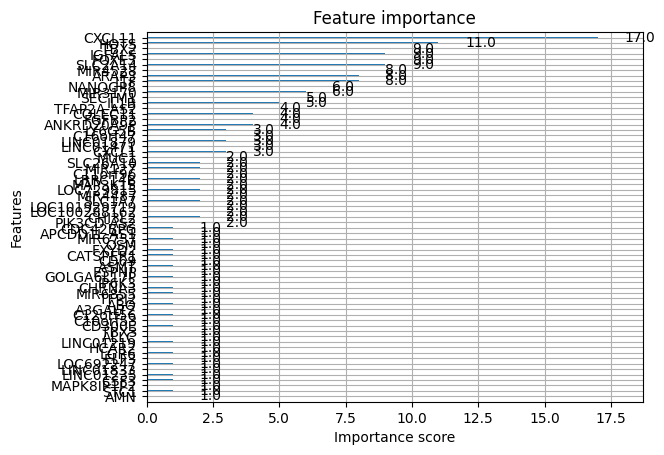

In [ ]:
from xgboost import plot_importance
plot_importance(model)

In [ ]:
model.score(X_val, y_val)

0.8888888888888888

In [ ]:
importances = model.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

# Get the top 100 most important features (if you have at least 100 features)
top_100_indices = indices[:100]

# If you want the names of the top 100 features (assuming X is a pandas DataFrame)
top_100_feature_names = X_train.columns[top_100_indices]

# Display the top 100 feature names and their importance values
top_100_importances = importances[top_100_indices]

# Create a DataFrame for better readability
top_100_df = pd.DataFrame({
    'Feature': top_100_feature_names,
    'Importance': top_100_importances
})

In [ ]:
top_100_df

,Feature,Importance
0,CXCL1,0.062540
1,NANOGP8,0.059928
2,APCDD1L-AS1,0.059692
3,MAP3K15,0.045430
4,ELF3,0.045316
...,...,...
95,GPR84,0.000000
96,SLAMF7,0.000000
97,ZNF645,0.000000
98,SPATA31A5,0.000000


In [ ]:
top_100_df.set_index('Feature', inplace=True)

In [ ]:
top_100_df

,Importance
Feature,
CXCL1,0.062540
NANOGP8,0.059928
APCDD1L-AS1,0.059692
MAP3K15,0.045430
ELF3,0.045316
...,...
GPR84,0.000000
SLAMF7,0.000000
ZNF645,0.000000


In [ ]:
sorted_res_cnm.index.intersection(top_100_df.index)

Index(['AMN', 'IL1B', 'CXCL1', 'STC1', 'PIK3CD-AS2', 'SECTM1', 'MAPK8IP1P2',
       'CSF3', 'SPATA31A5', 'SPATA31A7', 'CXCL11', 'CHI3L2', 'ANKRD20A9P',
       'LGALS17A', 'ZNF645', 'LOC100288162', 'HBD', 'IL6', 'WTAPP1', 'RPL29P2',
       'SPTA1', 'LTF', 'LINC01235', 'NXF2', 'NXF2B', 'CALCB', 'SIX3',
       'LINC01833', 'EXOC3L4', 'TH', 'CARMN', 'FGFBP2', 'MIR4673', 'LOC692247',
       'SELE', 'GPX2', 'GZMA', 'MIR181B1', 'ELF3', 'LGR6', 'MROH5', 'DGKK',
       'HCAR2', 'SLAMF7', 'SLC2A14', 'LINC01219', 'HOTS', 'LOC101929719',
       'SLC1A7', 'ALLC', 'TBX3', 'MIR4487', 'CD300E', 'LINC01471', 'COLEC11',
       'C10orf53', 'C12orf56', 'TFAP2A-AS2', 'A3GALT2', 'ABO', 'TFPI2',
       'MIR6855', 'CHRNA3', 'LOC729815', 'LINC01879', 'IP6K3', 'ARAP3',
       'GPR84', 'LOC339685', 'ANKRD20A19P', 'FOXE3', 'IGFALS', 'GOLGA6L17P',
       'ESPNP', 'ASMT', 'CD69', 'CATSPER1', 'MIR3170', 'MIR4528', 'MAP3K15',
       'FXYD2', 'C16orf47', 'LRRC14B', 'C11orf96', 'NANOGP8', 'TMEM92-AS1',
       'REELD1',

In [ ]:
gene_names = sorted_res_cnm.index.intersection(top_100_df.index)

  0%|          | 0/5 [00:00<?, ?it/s]

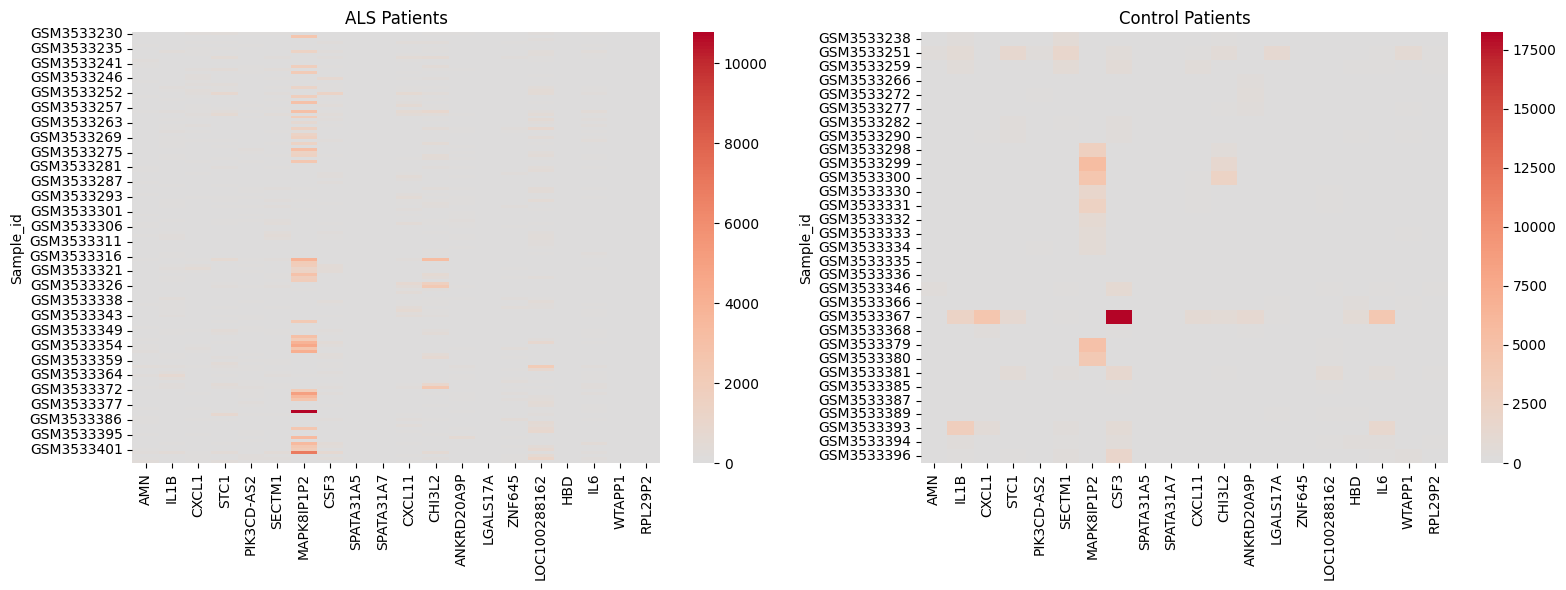

 20%|██        | 1/5 [00:06<00:24,  6.00s/it]

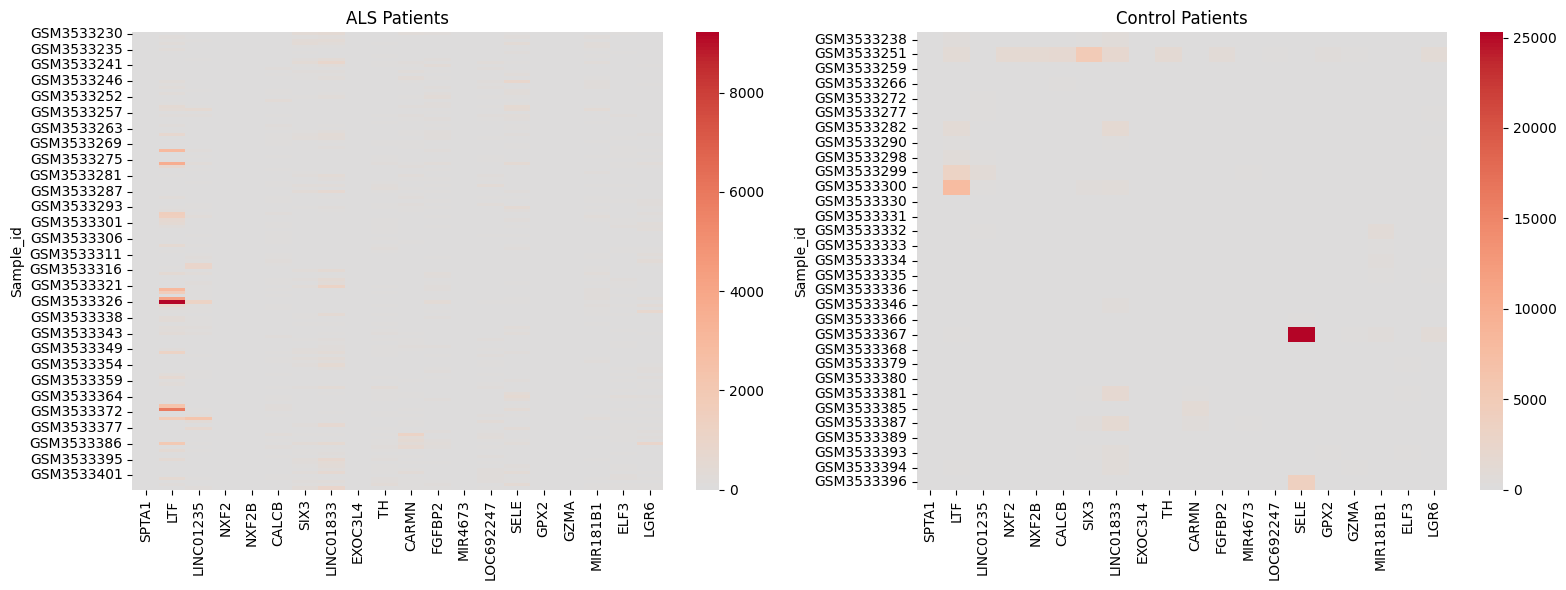

 40%|████      | 2/5 [00:11<00:17,  5.91s/it]

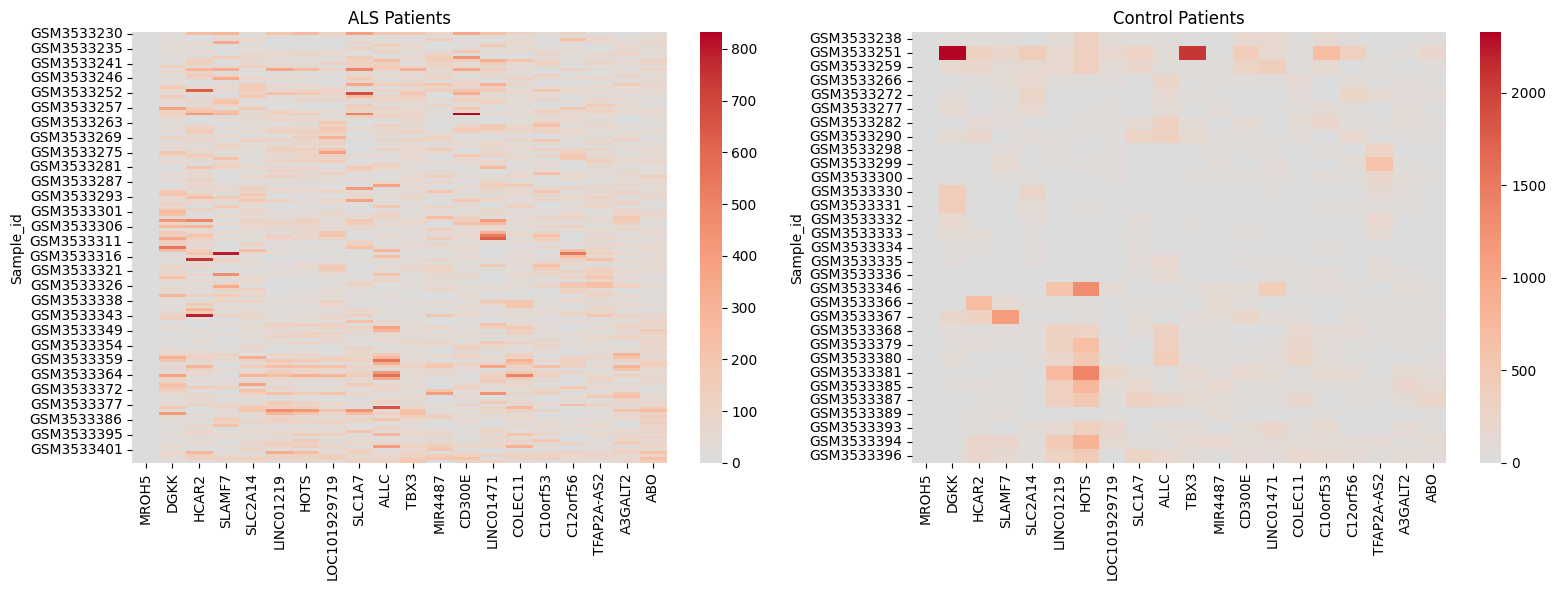

 60%|██████    | 3/5 [00:17<00:11,  5.95s/it]

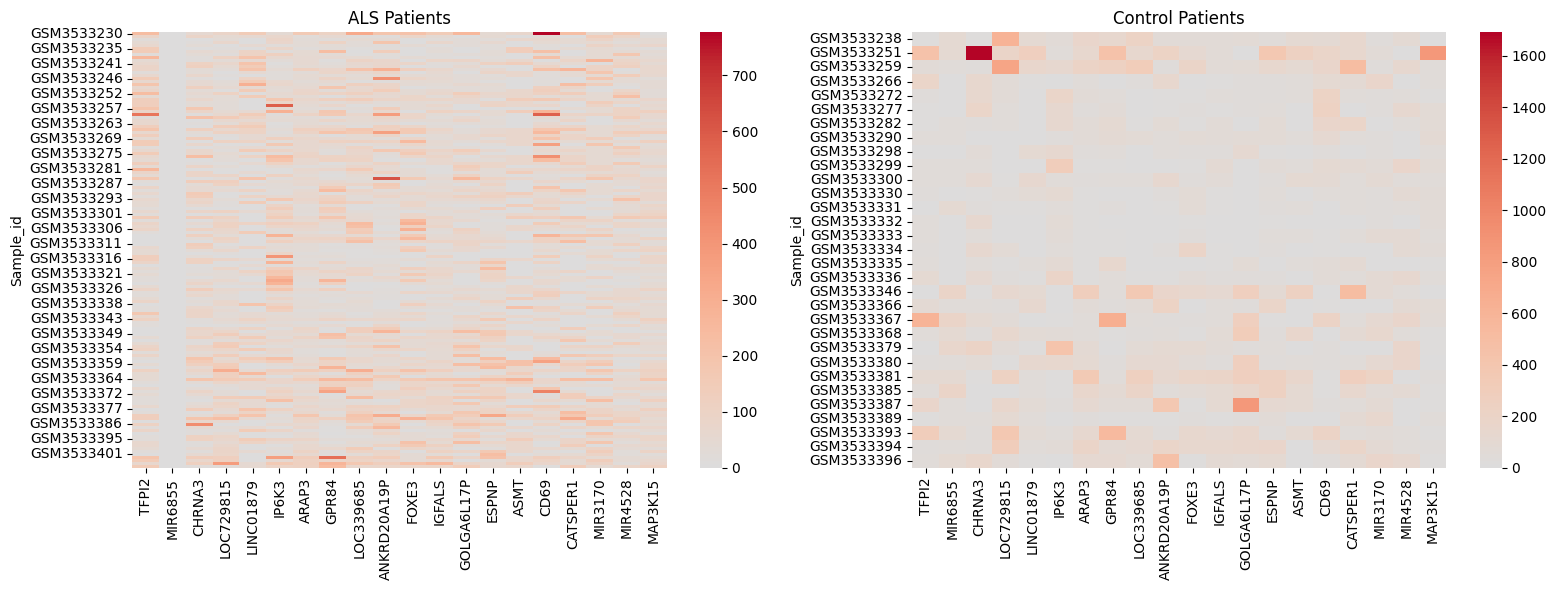

 80%|████████  | 4/5 [00:23<00:05,  5.87s/it]

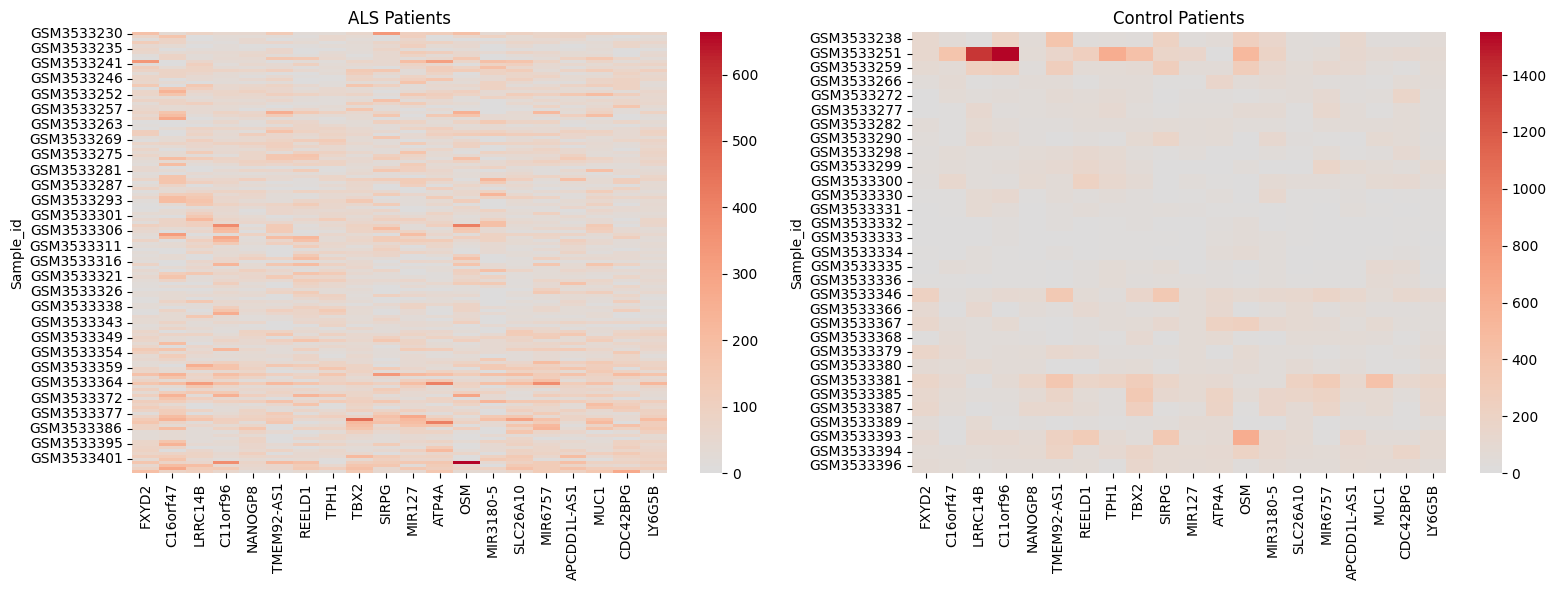

100%|██████████| 5/5 [00:28<00:00,  5.60s/it]


In [ ]:
for i in tqdm(range(0, len(gene_names), 20)) :
    subset_genes = gene_names[i:i+20]
    heatmap_comparison(subset_genes, c_data.get_data_als(), c_data.get_data_control())